In [152]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import seaborn as sns
import random

# Self-Attribution Bias

This is the bayes rule generalized to include self-serving beliefs. 
A self-serving belief will update asymmetrically when the evidence is positive or negative. When the evidence is positive, it will overweight the likelihood that it was generated by a pair of parameters such that $\theta > \omega$ and underweight the likelihood that it was generated by a pair of parameters such that $\theta < \omega$. When the evidence is negative, it will overweight the likelihood that it was generated by a pair of parameters such that $\theta < \omega$ and underweight the likelihood that it was generated by a pair of parameters such that $\theta > \omega$. This is done by adding parameters $c(\theta, \omega, news)$ such that 
    $$c(\theta_H, \omega, \text{good news}) < c(\theta_M, \omega, \text{good news}) < c(\theta_H, \omega, \text{bad news}) \quad \forall \omega$$
    And
    $$c(\theta, \omega_L, \text{good news}) < c(\theta, \omega_M, \text{good news}) < c(\theta, \omega_H, \text{bad news}) \quad \forall \theta$$


I will consider news to be good whenever more than half of the evidence is positive and bad whenever more than half of the evidence is negative.

The generalized bayes update rule is then given by:

$$ p_t(\theta, \omega) = \frac{p(s_t|\theta, \omega)^{c(\theta, \omega, news)}p_{t-1}(\theta, \omega)}{\sum_{\theta'}\sum_{\omega'}p(s_t|\theta', \omega')^{c(\theta', \omega', news)}p_{t-1}(\theta', \omega')} $$

where $news$ is good if $s/trials$ is greater than 0.5 and bad otherwise.

If $c$ is set to be constant ans equal to 1 for all possible values, then we get the standard bayes rule.



# Dogmatic Modeler

The agent is of a type $\theta^*$ and the exogenous parameter is $\omega^*$.

The dogmatic modeler starts with a degenerate belief that assigns probability 1 to a particular value $\hat{\theta}\neq \theta^*$ because the initial belief on theta is degenerate, they never change their mind. Instead, they start with a difussed prior on $\omega$ and update it using bayes rule. 

According to the theory in Heidhues, Koszegi and Strack (2018), they will fall into a self-defeating equilibrium. In my framework, because I have discretized the state space, not all combinations of $(\theta, \omega)$ lead to a self-defeating equilibrium. So I will focus on the cases where there is one. Those cases are the following : 

- $\theta=0$ and $\omega=2$ $\hat{\theta}=1$ and the trap arises by choosing $e = 0$ instead of 2
- $\theta=1$ and $\omega=0$ $\hat{\theta}=0$ and the trap arises by choosing $e = 1$ instead of 0
- $\theta=1$ and $\omega=1$ $\hat{\theta}=0$ and the trap arises by choosing $e = 2$ instead of 1
- $\theta=1$ and $\omega=1$ $\hat{\theta}=2$ and the trap arises by choosing $e = 0$ instead of 2
- $\theta=1$ and $\omega=2$ $\hat{\theta}=2$ and the trap arises by choosing $e = 1$ instead of 2

# The Switcher

The switcher starts off as being dogmatic but in the background keeps track of the likelihood that the data observed has been generated by the true value of $\omega$. After everey period they compare the likelihood of the alternative ($\theta^*$) to the likelihood of their initial dogmatic belief ($\hat{\theta}$). If the likelihood of the alternative is greater than the likelihood of the dogmatic belief by a factor of $\alpha$, then they switch to the alternative.

I calculate the value of $\alpha$ by looking at all the cases in which a subject chose to reveal a different matrix from the previous period and calculate the likelihood ratio of the matrix chosen this period relative to the matrix chosen the previous period. I exclude observations of subjects that switched 10 or 11 times during the task as well as observations in which the likelihood ratio is 100 or more to avoid a bias.

the likelihood ratio is computed by taking 
$$\frac{l(\theta^*)}{l(\hat{\theta})}= \frac{p(s^t|\theta^*)}{p(s^t|\hat{\theta})}$$

where $s^t$ is the sequence of signals observed up to period $t$. And $p(s^t|\theta) = \sum_{\omega'} p(s^t|\theta, \omega')$ which can be computed recursevely as $p(s^t|\theta, \omega) = \prod_{i=1}^t p(s_i|\theta, \omega)p_0(\omega)$ because signals are drawn independently of eachother in each period



# The Data Generating Process

There are 3 values of $\theta$ and 3 values of $\omega$. The probability of success is increasing in $\theta$ and $\omega$ and is maximized by choosing $e=\omega$.

The following table summarizes the DGP:

|               | $\omega_L$ | $\omega_M$ | $\omega_H$ |               | $\omega_L$ | $\omega_M$ | $\omega_H$ |               | $\omega_L$ | $\omega_M$ | $\omega_H$ |
|:-------------:|:----------:|:----------:|:----------:|:-------------:|:----------:|:----------:|:----------:|:-------------:|:----------:|:----------:|:----------:|
|     $e_H$     |     20     |     25     |     40      |     $e_H$     |     40     |     45     |    65      |     $e_H$     |     45     |     55     |     75     |
|     $e_M$     |     7      |     30     |     45      |     $e_M$     |     30     |     65     |     69     |     $e_M$     |     35     |     69     |     80     |
|     $e_L$     |     2      |     20     |     50      |     $e_L$     |      5     |     50     |     80     |     $e_L$     |     25     |     65     |     98     |
|               |            | $\theta_L$ |            |               |            | $\theta_M$ |            |               |            | $\theta_H$ |            |


In [153]:
# set the parameters
seeds = [3452, 3452, 3452]

# number of periods
T = 10

# number of trials
be_trials = 10

# alpha threshold for the switcher 
# (this will be estimated bu maximum likelihood from the data on the tables they are choosing to see)
a = 1.1

# base rate neglect (taken from Drobner and Goerg, 2022)
d = 1

# self-serving bias (overweight positive signals and underweight negative ones when updating on type and 
# do the opposite when updating on the exogenour parameter, also taken from Drobner and Goerg for now)
c_good_H = .11
c_good_M = .24
c_good_L = 1

c_bad_L = .11
c_bad_M = .24
c_bad_H = 1

attributions = [c_good_H, c_good_M, c_good_L, c_bad_L, c_bad_M, c_bad_H]

In [154]:
random.seed(3452
           )
        # draw the exogenous parameter for each task. It is 0, 1 or 2.
        # These are the same for all players and are saved at the session level
        # we want them to stay the same across sessions as well which is why a seed was set in advance
a = random.randint(0, 2)
b = random.randint(0, 2)
c = random.randint(0, 2)
d = random.randint(0, 2)
e = random.randint(0, 2)
f = random.randint(0, 2)

[a, b, c, d, e, f]

[1, 1, 0, 0, 1, 2]

In [155]:
# matrices: matrix[0] is the low type, matrix[2] is the high type. column 0 is low omega, row 0 is low effort
ml = np.array([[.20, .25, .40], [.07, .30, .45], [.02, .20, .50]])
mm = np.array([[.40, .45, .65], [.30, .65, .69], [.05, .50, .80]])
mh = np.array([[.45, .55, .75], [.35, .69, .80], [.25, .65, .98]])

msc = [ml, mm, mh]


In [156]:
###### THIS IS A BAYES UPDATE THAT IGNARES THAT AFTER THE FIRST SIGNAL REALIZATION, THE TWO PARAMETERS ARE CORRELATED CONSITIONAL ON THE SIGNAL
####

# generalized bayes update: if the bias parameters are all 1, it is bayes, if d is less than one it is base rate-neglect
# if c is not all ones, it is attribution bias.
def bayes_biases(c, brn, p0_theta, p0_omega, signal, M, e_index):
    # c is the vector of attribution biases [theta_positive, theta_negative, omega_positive, omega_negative]
    # brn is the base rate neglect parameter
    # p0 are the priors
    # the signal is a binary vector of length be_trials 
    # M is the 3 matrices with the probabilitites of success conditional on each of the values of theta and omega
    # e_index is the effort level chosen in the round
    
    # nuber of sucesses
    k = sum(signal)
    n = len(signal)
    # set the exponents for the bias
    if k>=n/2:
        c_theta = c[0]
        c_omega = c[2]
    else:
        c_theta = c[1]
        c_omega = c[3]
    # matrix with all the probabilities (the row corresponding to e_index) stacked by theta
    matrix = np.array([sp.stats.binom.pmf(k, n, M[0][e_index, :], loc=0), 
                       sp.stats.binom.pmf(k, n, M[1][e_index, :], loc=0), 
                       sp.stats.binom.pmf(k, n, M[2][e_index, :], loc=0)])
    
    # The first term in the numerator 
    p_omega = np.power(p0_theta@matrix, c_omega)
    p_theta = np.power(matrix@p0_omega, c_theta)
     
    # multiply by the prior to the brn to get the 3 numerators
    num_omega = np.diag( np.diagflat(p_omega) @ np.power(np.diagflat(p0_omega), brn) )
    num_theta = np.diag( np.diagflat(p_theta) @ np.power(np.diagflat(p0_theta), brn) )
    
    # denominator is the sum of the numerators
    denom_o = np.sum(num_omega)
    denom_th = np.sum(num_theta)
    
    # the posterior beiefs
    p1_omega = num_omega/denom_o
    p1_theta = num_theta/denom_th
    
    # save the likelihoods for theta in a vector with [H/M, M/L, H/L]
    likelihoods = [num_theta[2]/num_theta[1], num_theta[1]/num_theta[0], num_theta[2]/num_theta[0]]

        
    return p1_theta, p1_omega, likelihoods
    
    

In [157]:
###### THIS IS THE CORRECT BAYES UPDATE######
# joint bayesian update

def joint_bayes(p0, signal, M, e_index):
    # nuber of sucesses
    k = sum(signal)
    n = len(signal)
    # the probabilities of having observed each of the signals
    matrix = np.array([sp.stats.binom.pmf(k, n, M[0][e_index, :], loc=0), 
                       sp.stats.binom.pmf(k, n, M[1][e_index, :], loc=0), 
                       sp.stats.binom.pmf(k, n, M[2][e_index, :], loc=0)])
    
    # set the numerators
    num = np.diagflat(p0) @ np.diagflat(matrix)
    #take only the diagonal
    num = np.diag(num)

    # sum all the numerators to get the denominator
    denom = np.sum(num)

    # the posterior beliefs are each of the numerators divided by the denominator
    p1 = num/denom

    # p1 has the order (00, 01, 02, 10, 11, 12, 20, 21, 22)
    
    return p1

    
    
    
    

In [158]:
###### THIS IS THE BAYES UPDATE WITH THE BIAS PARAMETERS C######
# joint bayesian update

def joint_bayes_biased(p0, signal, M, e_index, c):
    # number of sucesses
    k = sum(signal)
    n = len(signal)
    # determine if it is good news or bad news and set the parameter c accordingly
    
    if k>=n/2:
        c_H = c[0]
        c_M = c[1]
        c_L = c[2]
    else:
        c_L = c[3]
        c_M = c[4]
        c_H = c[5]
    
    # the probabilities of having observed each of the signals
    matrix = np.array([sp.stats.binom.pmf(k, n, M[0][e_index, :], loc=0), 
                       sp.stats.binom.pmf(k, n, M[1][e_index, :], loc=0), 
                       sp.stats.binom.pmf(k, n, M[2][e_index, :], loc=0)])
    
    
    if k>=n/2:
        matrix_bias = [[matrix[0, 0]**c_L, matrix[0, 1]**c_L, matrix[0, 2]**c_L],
                       [matrix[1, 0]**c_M, matrix[1, 1]**c_M, matrix[1, 2]**c_M],
                       [matrix[2, 0]**c_H, matrix[2, 1]**c_H, matrix[2, 2]**c_H]]
    else:
        matrix_bias = [[matrix[0, 0]**c_L, matrix[0, 1]**c_M, matrix[0, 2]**c_H],
                       [matrix[1, 0]**c_L, matrix[1, 1]**c_M, matrix[1, 2]**c_H],
                       [matrix[2, 0]**c_L, matrix[2, 1]**c_M, matrix[2, 2]**c_H]]
    
    # set the numerators
    num = np.diagflat(p0) @ np.diagflat(matrix_bias)
    #take only the diagonal
    num = np.diag(num)

    # sum all the numerators to get the denominator
    denom = np.sum(num)

    # the posterior beliefs are each of the numerators divided by the denominator
    p1 = num/denom

    # p1 has the order (00, 01, 02, 10, 11, 12, 20, 21, 22)
    
    return p1

In [159]:
# bayesian choices (the inputs are the belief (nine-dimensional array) and the DGP (msc), returns the index of the choice that maximizes the expected utility)
# this can be used for the unbiased and the biased updates since it only takes the posterior belief ans calculates the expectated utility for each of the choices

def joint_bayes_c(p1, M):
    # compute the expected payoffs for each of the 3 choices
    # the expected payoff is the probability of success times the probability of that combination of parameters
    # Take the first row of each of the matrices in M and cancatenate them (this will match the order of the probabilities in the posterior)
    choices_1 = np.concatenate((M[0][0, :], M[1][0, :], M[2][0, :]))
    # Take the second row of each of the matrices in M and stack them
    choices_2 = np.concatenate((M[0][1, :], M[1][1, :], M[2][1, :]))
    # Take the third row of each of the matrices in M and concatenate them
    choices_3 = np.concatenate((M[0][2, :], M[1][2, :], M[2][2, :]))

    # multiply the choices by the probabilities in the posterior
    Eu= [choices_1@p1, choices_2@p1, choices_3@p1]

    e_index = np.argmax(Eu)
    
    return e_index
    


In [160]:
# function that simulates the joint biased bayes only (this can be turned into the correct bayesian y settinc c=[1, 1, 1, 1])

def simulate_joint_bayes_biased(theta, omega, p0_theta, p0_omega, M, c, d, T, N, trials, seeds, alpha):
    
    ###### Determine the outcomes beforehand
    # set a seed for each type
    rng_H = np.random.default_rng(seed=seeds[0])
    
    

    #############
    # generate all the draws for T periods for each type and for each effort choice
    ############

    ##### for the high types
    # outcomes after choosing L
    outcome_H_L = rng_H.binomial(1, M[2][0, omega], size=(T, be_trials))
    # outcomes after choosing M
    outcome_H_M = rng_H.binomial(1, M[2][1, omega], size=(T, be_trials))
    # outcomes after choosing H
    outcome_H_H = rng_H.binomial(1, M[2][2, omega], size=(T, be_trials))

    ##### for the medium types
    rng_M = np.random.default_rng(seed=seeds[1])
    # after low effort
    outcome_M_L = rng_M.binomial(1, M[1][0, omega], size=(T, be_trials))
    # after medium effort
    outcome_M_M = rng_M.binomial(1, M[1][1, omega], size=(T, be_trials))
    # after high effort
    outcome_M_H = rng_M.binomial(1, M[1][2, omega], size=(T, be_trials))

    #### for the low types
    rng_L = np.random.default_rng(seed=seeds[2])
    outcomes_L_L = rng_L.binomial(1, M[0][0, omega], size=(T, be_trials))
    outcomes_L_M = rng_L.binomial(1, M[0][1, omega], size=(T, be_trials))
    outcomes_L_H = rng_L.binomial(1, M[0][2, omega], size=(T, be_trials))

    # stack the outcome vectors foe each type into a matrix. first element is the effort choice, secod is t
    outcomes_H = np.stack((outcome_H_L, outcome_H_M, outcome_H_H))
    outcomes_M = np.stack((outcome_M_L, outcome_M_M, outcome_M_H))
    outcomes_L = np.stack((outcomes_L_L, outcomes_L_M, outcomes_L_H))

    # stack all the matrices into a single outcomes matrix of matrices
    outcomes = np.stack((outcomes_L, outcomes_M, outcomes_H))
    
    
    #############
    # set empty vectors where all the data will be saved period by period for each of the models
    ############
    # beliefs
    # take every value of p0_theta and multiply by each value of p0_omega
    p_joint_bayes_biased = [np.kron(p0_theta, p0_omega)]
    
    # choices
    e_joint_bay_biased = [joint_bayes_c(p_joint_bayes_biased[0], M)]
    
    signals = outcomes[theta]
    
    for t in range(T):
        # get the signals 
        
        signal_bay = signals[e_joint_bay_biased[t], omega]
        
        # update beliefs 
        
        p1_joint = joint_bayes_biased(p_joint_bayes_biased[t], signal_bay, M, e_joint_bay_biased[t], c)
        p_joint_bayes_biased.append(p1_joint)
    
        
        # Choices for each model and each believed type
        e_joint_biased_t = joint_bayes_c(p_joint_bayes_biased[t], M)
        e_joint_bay_biased.append(e_joint_biased_t)
        
    return e_joint_bay_biased


In [161]:
# simulate the correct bayesian choices
def simulate_joint_bayes(theta, omega, p0_theta, p0_omega, M, c, d, T, N, trials, seeds, alpha):
    
    ###### Determine the outcomes beforehand
    # set a seed for each type
    rng_H = np.random.default_rng(seed=seeds[0])
    
    

    #############
    # generate all the draws for T periods for each type and for each effort choice
    ############

    ##### for the high types
    # outcomes after choosing L
    outcome_H_L = rng_H.binomial(1, M[2][0, omega], size=(T, be_trials))
    # outcomes after choosing M
    outcome_H_M = rng_H.binomial(1, M[2][1, omega], size=(T, be_trials))
    # outcomes after choosing H
    outcome_H_H = rng_H.binomial(1, M[2][2, omega], size=(T, be_trials))

    ##### for the medium types
    rng_M = np.random.default_rng(seed=seeds[1])
    # after low effort
    outcome_M_L = rng_M.binomial(1, M[1][0, omega], size=(T, be_trials))
    # after medium effort
    outcome_M_M = rng_M.binomial(1, M[1][1, omega], size=(T, be_trials))
    # after high effort
    outcome_M_H = rng_M.binomial(1, M[1][2, omega], size=(T, be_trials))

    #### for the low types
    rng_L = np.random.default_rng(seed=seeds[2])
    outcomes_L_L = rng_L.binomial(1, M[0][0, omega], size=(T, be_trials))
    outcomes_L_M = rng_L.binomial(1, M[0][1, omega], size=(T, be_trials))
    outcomes_L_H = rng_L.binomial(1, M[0][2, omega], size=(T, be_trials))

    # stack the outcome vectors foe each type into a matrix. first element is the effort choice, secod is t
    outcomes_H = np.stack((outcome_H_L, outcome_H_M, outcome_H_H))
    outcomes_M = np.stack((outcome_M_L, outcome_M_M, outcome_M_H))
    outcomes_L = np.stack((outcomes_L_L, outcomes_L_M, outcomes_L_H))

    # stack all the matrices into a single outcomes matrix of matrices
    outcomes = np.stack((outcomes_L, outcomes_M, outcomes_H))
    
    
    #############
    # set empty vectors where all the data will be saved period by period for each of the models
    ############
    # beliefs
    # take every value of p0_theta and multiply by each value of p0_omega
    p_joint_bayes = [np.kron(p0_theta, p0_omega)]
    
    # choices
    e_joint_bay = [joint_bayes_c(p_joint_bayes[0], M)]
    
    signals = outcomes[theta]
    
    for t in range(T):
        # get the signals 
        
        signal_bay = signals[e_joint_bay[t], omega]
        
        # update beliefs 
        
        p1_joint = joint_bayes(p_joint_bayes[t], signal_bay, M, e_joint_bay[t])
        p_joint_bayes.append(p1_joint)
    
        
        # Choices for each model and each believed type
        e_joint_t = joint_bayes_c(p_joint_bayes[t], M)
        e_joint_bay.append(e_joint_t)
        
    return e_joint_bay

In [162]:
simulate_joint_bayes(0, 2, [1/3, 1/3, 1/3], [1/3, 1/3, 1/3], msc, 1, 1, T, 1, be_trials, seeds, 1)

[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [163]:
simulate_joint_bayes_biased(0, 2, [1/3, 1/3, 1/3], [1/3, 1/3, 1/3], msc, attributions, 1, T, 1, be_trials, seeds, 1)

[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [164]:
def update_dog(prior, type_belief, signal, M, e_index):
    k = sum(signal)
    n = len(signal)
    
    p = sp.stats.binom.pmf(k, n, M[type_belief][e_index, :], loc=0)
    
    num = np.diag(np.diagflat(prior)@np.diagflat(p))
    denom = sum(num)
    
    posterior = num/denom
    
    return posterior
    
    

In [165]:
def update_lr(prior, type_belief, signal, M, e_index):
    k = sum(signal)
    n = len(signal)
    
    p = sp.stats.binom.pmf(k, n, M[type_belief][e_index, :], loc=0)
    
    num = np.diag(np.diagflat(prior)@np.diagflat(p))
    denom = sum(num)
    
    posterior = num/denom
    
    likelihoods = [num[0], num[1], num[2]]
    
    return posterior, likelihoods

In [166]:
# a function that chooses a level of effort for the dogmatic and the switcher
def choice_dog(prior, type_belief, M):
    # type belief should be 0, 1, or 2
    # the prior is over omegas. 
    # M is a vector of the three probability matrices (L, M, H)
    # calculate the expected utility from each choice
    Eu = np.dot(M[type_belief], prior)
    # element that maximizes the flow utility is the choice
    e_index = np.argmax(Eu)
    
    return e_index

In [167]:
# a function that chooses the level of effort for the bayesian and the self-serving
def choice_bay(p0_theta, p0_omega, M):
    # expected utility consitional on each type and each choice
    Eu_theta = [np.dot(M[0], p0_omega), np.dot(M[1], p0_omega), np.dot(M[2], p0_omega)]
    # Expected utility conditional only on choices
    Eu = np.dot(np.transpose(Eu_theta), p0_theta)
    e_index = np.argmax(Eu) 
    
    return e_index



In [168]:
def simulate(theta, omega, p0_theta, p0_omega, M, c, d, T, N, trials, seeds, alpha):
    
    ###### Determine the outcomes beforehand
    # set a seed for each type
    rng_H = np.random.default_rng(seed=seeds[0])
    
    signals_ss = [0]
    signals_lr_L = [0]
    signals_lr_M = [0]
    signals_lr_H = [0]
    signals_dog_L = [0]
    signals_dog_M = [0]
    signals_dog_H = [0]
    signals_bay = [0]

    #############
    # generate all the draws for T periods for each type and for each effort choice
    ############

    ##### for the high types
    # outcomes after choosing L
    outcome_H_L = rng_H.binomial(1, M[2][0, omega], size=(T, be_trials))
    # outcomes after choosing M
    outcome_H_M = rng_H.binomial(1, M[2][1, omega], size=(T, be_trials))
    # outcomes after choosing H
    outcome_H_H = rng_H.binomial(1, M[2][2, omega], size=(T, be_trials))

    ##### for the medium types
    rng_M = np.random.default_rng(seed=seeds[1])
    # after low effort
    outcome_M_L = rng_M.binomial(1, M[1][0, omega], size=(T, be_trials))
    # after medium effort
    outcome_M_M = rng_M.binomial(1, M[1][1, omega], size=(T, be_trials))
    # after high effort
    outcome_M_H = rng_M.binomial(1, M[1][2, omega], size=(T, be_trials))

    #### for the low types
    rng_L = np.random.default_rng(seed=seeds[2])
    outcomes_L_L = rng_L.binomial(1, M[0][0, omega], size=(T, be_trials))
    outcomes_L_M = rng_L.binomial(1, M[0][1, omega], size=(T, be_trials))
    outcomes_L_H = rng_L.binomial(1, M[0][2, omega], size=(T, be_trials))

    # stack the outcome vectors foe each type into a matrix. first element is the effort choice, secod is t
    outcomes_H = np.stack((outcome_H_L, outcome_H_M, outcome_H_H))
    outcomes_M = np.stack((outcome_M_L, outcome_M_M, outcome_M_H))
    outcomes_L = np.stack((outcomes_L_L, outcomes_L_M, outcomes_L_H))

    # stack all the matrices into a single outcomes matrix of matrices
    outcomes = np.stack((outcomes_L, outcomes_M, outcomes_H))
    
    
    #############
    # set empty vectors where all the data will be saved period by period for each of the models
    ############
    # beliefs
    p_theta_bay =[p0_theta]
    p_omega_bay = [p0_omega]
    
    p_theta_ss =[p0_theta]
    p_omega_ss = [p0_omega]
    
    p_theta_dog_L =[0]
    p_theta_dog_M =[1]
    p_theta_dog_H =[2]
    p_omega_dog_H = [p0_omega]
    p_omega_dog_M = [p0_omega]
    p_omega_dog_L = [p0_omega]
    
    theta_lr_L =[0]
    theta_lr_M =[1]
    theta_lr_H =[2]
    p_omega_lr_H = [p0_omega]
    p_omega_lr_M = [p0_omega]
    p_omega_lr_L = [p0_omega]
    
    # choices
    e_bay = [choice_bay(p0_theta, p0_omega, M)]
    
    e_ss = [choice_bay(p0_theta, p0_omega, M)]
    
    e_dog_L = [0]
    e_dog_M = [1]
    e_dog_H = [2]
    
    e_lr_L = [0]
    e_lr_M = [1]
    e_lr_H = [2]
    
    # likelihood theta H/M, M/L, H/L
    likelihoods = [[p0_theta[2]/p0_theta[1], p0_theta[1]/p0_theta[0], p0_theta[2]/p0_theta[0]]]
    
    signals = outcomes[theta]

    # beliefs
    # take every value of p0_theta and multiply by each value of p0_omega
    p_joint_bayes = [np.kron(p0_theta, p0_omega)]
    p_joint_biased = [np.kron(p0_theta, p0_omega)]
    
    # choices
    e_joint_bay = [joint_bayes_c(p_joint_bayes[0], M)]
    e_joint_biased = [joint_bayes_c(p_joint_biased[0], M)]
    
    for t in range(T):
        # get the signals for each model
        signal_dog_H = signals[e_dog_H[t], t]
        signal_dog_M = signals[e_dog_M[t], t]
        signal_dog_L = signals[e_dog_L[t], t]
        
        signal_lr_H = signals[e_lr_H[t], t]
        signal_lr_M = signals[e_lr_M[t], t]
        signal_lr_L = signals[e_lr_L[t], t]
        
        signal_bay = signals[e_bay[t], t]
        signal_ss = signals[e_ss[t], t]
        
        # update beliefs for each model and each believed type
        
        ### bayesian
        bay_theta, bay_omega, bay_lr = bayes_biases([1,1,1, 1], 1, p_theta_bay[t], p_omega_bay[t], signal_bay, M, e_bay[t])
        p_theta_bay.append(bay_theta)
        p_omega_bay.append(bay_omega)
        
        ### self-serving
        ss_theta, ss_omega, ss_lr = bayes_biases(c, d, p_theta_ss[t], p_omega_ss[t], signal_ss, M, e_ss[t])
        p_theta_ss.append(ss_theta)
        p_omega_ss.append(ss_omega)
        
        ### likelihood ratio
        omega_lr_H, l_H = update_lr(p_omega_lr_H[t], theta_lr_H[t], signal_lr_H, M, e_lr_H[t])
        omega_lr_M, l_M = update_lr(p_omega_lr_M[t], theta_lr_M[t], signal_lr_M, M, e_lr_M[t])
        omega_lr_L, l_L = update_lr(p_omega_lr_L[t], theta_lr_L[t], signal_lr_L, M, e_lr_L[t])
        
        p_omega_lr_H.append(omega_lr_H)
        p_omega_lr_M.append(omega_lr_M)
        p_omega_lr_L.append(omega_lr_L)
        
        ### dogmatic
        omega_dog_H = update_dog(p_omega_dog_H[t], 2, signal_dog_H, M, e_dog_H[t])
        omega_dog_M = update_dog(p_omega_dog_M[t], 1, signal_dog_M, M, e_dog_M[t])
        omega_dog_L = update_dog(p_omega_dog_L[t], 0, signal_dog_L, M, e_dog_L[t])
        
        p_omega_dog_H.append(omega_dog_H)
        p_omega_dog_M.append(omega_dog_M)
        p_omega_dog_L.append(omega_dog_L)
        
        
        # take the most likely type and check if the likelihood ratio vs the current model is above alpha
        # if it is, set it as the theta for the switcher
        
        H_top = np.argmax(l_H)
        H_current = theta_lr_H[t]
        LR_H = l_H[H_top]/l_H[H_current]
        
        if LR_H >= alpha:
            theta_lr_H.append(H_top)
        else:
            theta_lr_H.append(H_current) 
        
        M_top = np.argmax(l_M)
        M_current = theta_lr_M[t]
        LR_M = l_M[M_top]/l_M[M_current]
        
        if LR_M >= alpha:
            theta_lr_M.append(M_top)
        else:
            theta_lr_M.append(M_current)
            
        L_top = np.argmax(l_L)
        L_current = theta_lr_L[t]
        LR_L = l_L[L_top]/l_L[L_current]
        
        if LR_L >= alpha:
            theta_lr_L.append(L_top)
        else:
            theta_lr_L.append(L_current)
        
        # Choices for each model and each believed type
        e_bay_t = choice_bay(bay_theta, bay_omega, M)
        e_bay.append(e_bay_t)
        
        e_ss_t = choice_bay(ss_theta, ss_omega, M)
        e_ss.append(e_ss_t)
        
        e_dog_H.append(choice_dog(omega_dog_H, 2, M))
        e_dog_M.append(choice_dog(omega_dog_M, 1, M))
        e_dog_L.append(choice_dog(omega_dog_L, 0, M))
        
        e_lr_H.append(choice_dog(omega_lr_H, theta_lr_H[-1], M))
        e_lr_M.append(choice_dog(omega_lr_M, theta_lr_M[-1], M))
        e_lr_L.append(choice_dog(omega_lr_L, theta_lr_L[-1], M))

        ##### joint bayes
        # get the signals 
        
        signal_bay = signals[e_joint_bay[t], omega]
        
        # update beliefs 
        
        p1_joint = joint_bayes(p_joint_bayes[t], signal_bay, M, e_joint_bay[t])
        p_joint_bayes.append(p1_joint)
    
        
        # Choices for each model and each believed type
        e_joint_t = joint_bayes_c(p_joint_bayes[t], M)
        e_joint_bay.append(e_joint_t)

        ##### joint biased bayes
        # get the signals 
        
        signal_bay_bias = signals[e_joint_biased[t], omega]
        
        # update beliefs 
        
        p1_joint_biased = joint_bayes_biased(p_joint_biased[t], signal_bay_bias, M, e_joint_biased[t], c)
        p_joint_biased.append(p1_joint_biased)
    
        
        # Choices for each model and each believed type
        e_joint_biased_t = joint_bayes_c(p_joint_biased[t], M)
        e_joint_biased.append(e_joint_biased_t)

        signals_ss.append(sum(signal_bay_bias))
        
        signals_lr_L.append(sum(signal_lr_L))
        signals_lr_M.append(sum(signal_lr_M))
        signals_lr_H.append(sum(signal_lr_H))

        signals_dog_L.append(sum(signal_dog_L))
        signals_dog_M.append(sum(signal_dog_M))
        signals_dog_H.append(sum(signal_dog_H))

        signals_bay.append(sum(signal_bay))
        
    return [e_lr_L, e_lr_M, e_lr_H, 
            e_dog_L, e_dog_M, e_dog_H, 
            e_bay, e_ss, e_joint_bay, e_joint_biased,
            theta_lr_L, theta_lr_M, theta_lr_H, 
            signals_ss, 
            signals_lr_L, signals_lr_M, signals_lr_H, 
            signals_dog_L, signals_dog_M, signals_dog_H, 
            signals_bay]


In [169]:
choices_00 = simulate(0, 0, [1/2,1/3, 1/3], [1/3,1/3, 1/3], msc, attributions, 1, T, 1, be_trials, seeds, a)
choices_01 = simulate(0, 1, [1/3,1/3, 1/3], [1/3,1/3, 1/3], msc, attributions, 1, T, 1, be_trials, seeds, a)
choices_02 = simulate(0, 2, [1/3,1/3, 1/3], [1/3,1/3, 1/3], msc, attributions, 1, T, 1, be_trials, seeds, a)

choices_10 = simulate(1, 0, [1/3,1/3, 1/3], [1/3,1/3, 1/3], msc, attributions, 1, T, 1, be_trials, seeds, a)
choices_11 = simulate(1, 1, [1/3,1/3, 1/3], [1/3,1/3, 1/3], msc, attributions, 1, T, 1, be_trials, seeds, a)
choices_12 = simulate(1, 2, [1/3,1/3, 1/3], [1/3,1/3, 1/3], msc, attributions, 1, T, 1, be_trials, seeds, a)

choices_20 = simulate(2, 0, [1/3,1/3, 1/3], [1/3,1/3, 1/3], msc, attributions, 1, T, 1, be_trials, seeds, a)
choices_21 = simulate(2, 1, [1/3,1/3, 1/3], [1/3,1/3, 1/3], msc, attributions, 1, T, 1, be_trials, seeds, a)
choices_22 = simulate(2, 2, [1/3,1/3, 1/3], [1/3,1/3, 1/3], msc, attributions, 1, T, 1, be_trials, seeds, a)

In [170]:
def plot(choices, theta, omega):
    
    fig, axs = plt.subplots(3, 3, figsize=(20, 15))
    axs[0,0].plot(choices[0])
    axs[0,1].plot(choices[1])
    axs[0,2].plot(choices[2])
    # plot the belief of type for the switcher
    #axs[0,0].plot(choices[8])
    #axs[0,1].plot(choices[9])
    #axs[0,2].plot(choices[10])
    
    axs[0, 0].set_title('switcher, belief L')
    axs[0, 1].set_title('switcher, belief M')
    axs[0, 2].set_title('switcher, belief H')

    axs[1,0].plot(choices[3])
    axs[1,1].plot(choices[4])
    axs[1,2].plot(choices[5])
    
    axs[1, 0].set_title('dogmatic, belief L')
    axs[1, 1].set_title('dogmatic, belief M')
    axs[1, 2].set_title('dogmatic, belief H')

    axs[2,0].plot(choices[8])
    axs[2,1].plot(choices[9])
    
    
    axs[2, 0].set_title('Bayesian')
    axs[2, 1].set_title('Self Serving')
    
    
    axs[0, 0].set_ylim(-0.5, 2.5)
    axs[0, 1].set_ylim(-.5, 2.5)
    axs[0, 2].set_ylim(-.5, 2.5)
    axs[1, 0].set_ylim(-.5, 2.5)
    axs[1, 1].set_ylim(-.5, 2.5)
    axs[1, 2].set_ylim(-.5, 2.5)
    axs[2, 0].set_ylim(-.5, 2.5)
    axs[2, 1].set_ylim(-.5, 2.5)
    axs[2, 2].set_ylim(-.5, 2.5)

    if theta == 1:
        type = 'Mid Type'
    if theta ==0:
        type = 'Low Type'
    if theta ==2:
        type = 'High Type'

    axs[2,0].set_xlabel('round')
    axs[2,1].set_xlabel('round')
    axs[2,2].set_xlabel('round')

    axs[0, 0].set_ylabel('effort choice')
    axs[1, 0].set_ylabel('effort choice')
    axs[2, 0].set_ylabel('effort choice')

    axs[0, 0].set_yticks([0, 1, 2])
    axs[1, 0].set_yticks([0, 1, 2])
    axs[2, 0].set_yticks([0, 1, 2])

    axs[0, 1].set_yticks([0, 1, 2])
    axs[1, 1].set_yticks([0, 1, 2])
    axs[2, 1].set_yticks([0, 1, 2])

    axs[0, 2].set_yticks([0, 1, 2])
    axs[1, 2].set_yticks([0, 1, 2])
    axs[2, 2].set_yticks([0, 1, 2])
    
    fig.suptitle(type + ', rate = '+str(omega))

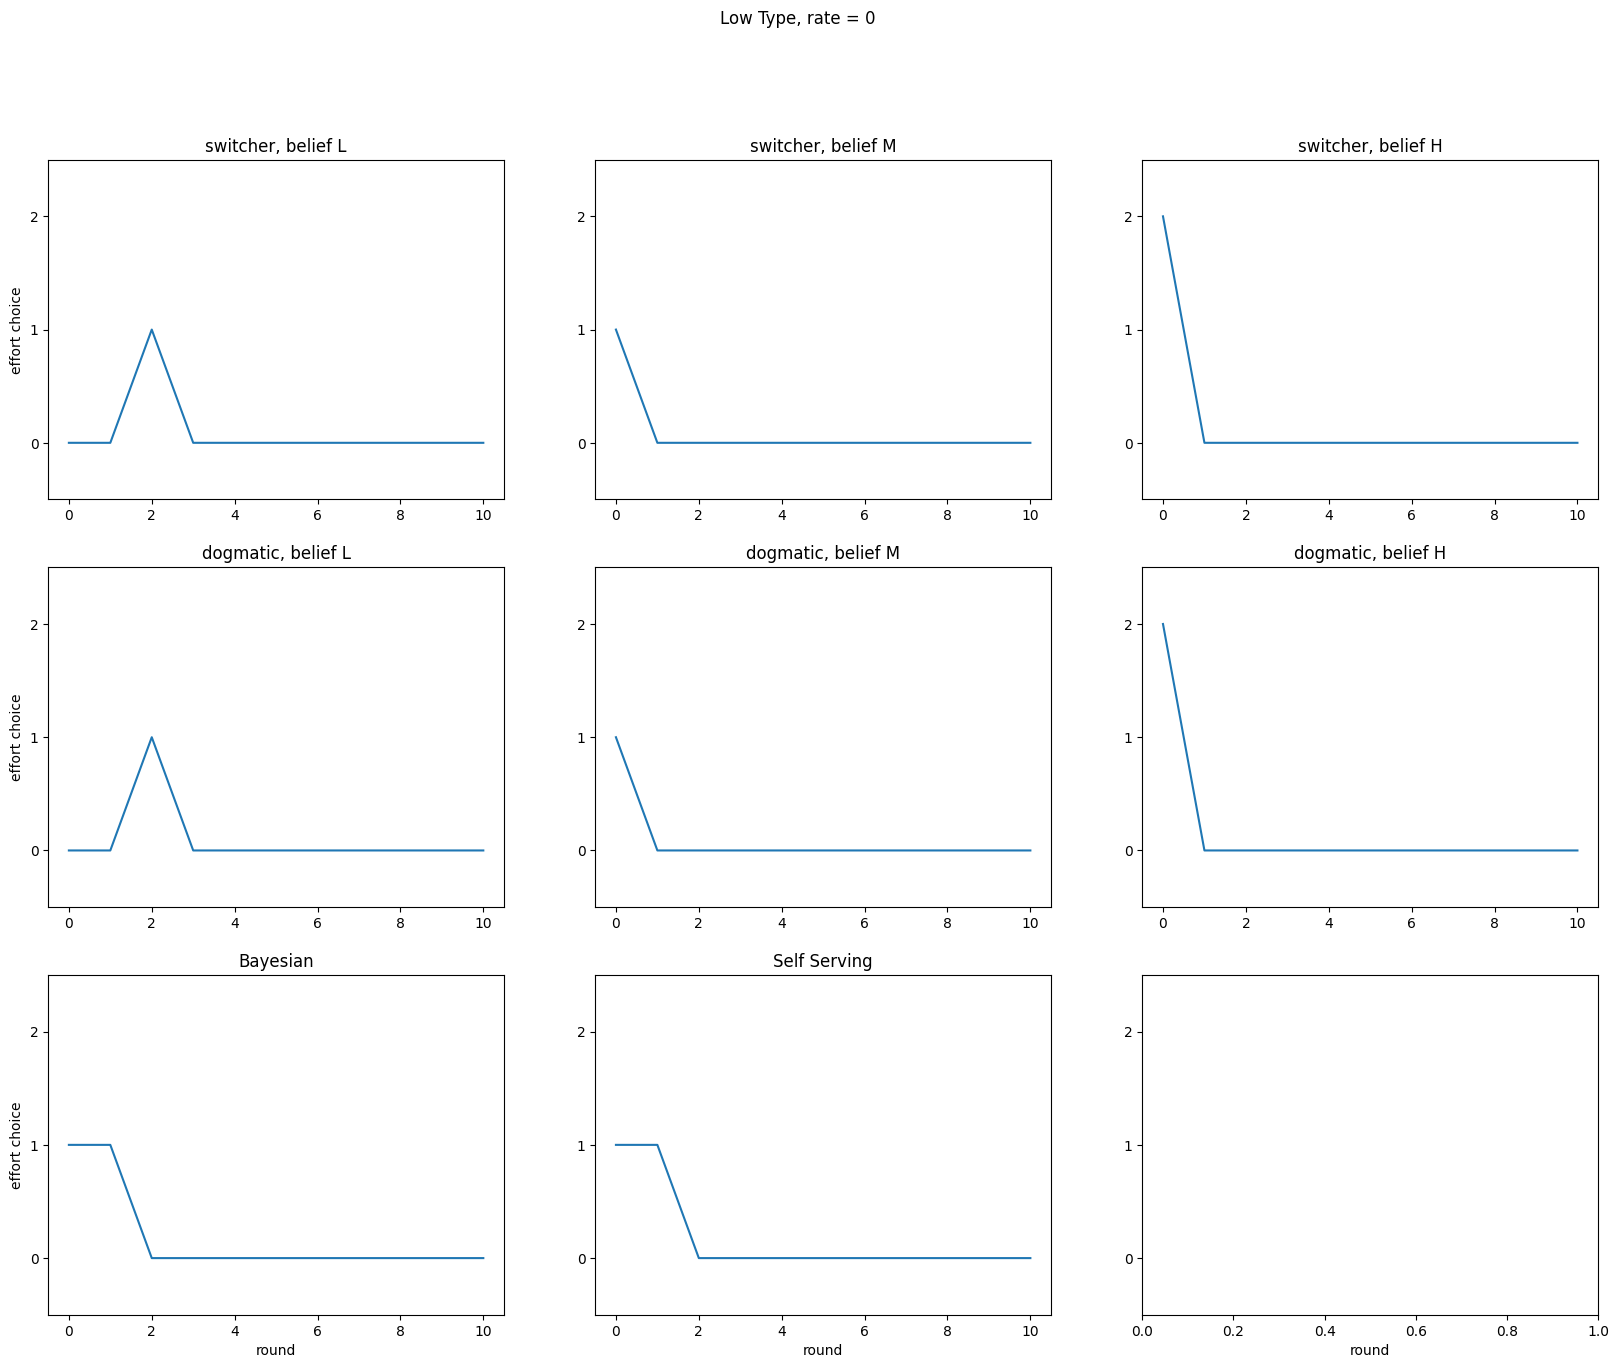

In [171]:
plot(choices_00, 0, 0)



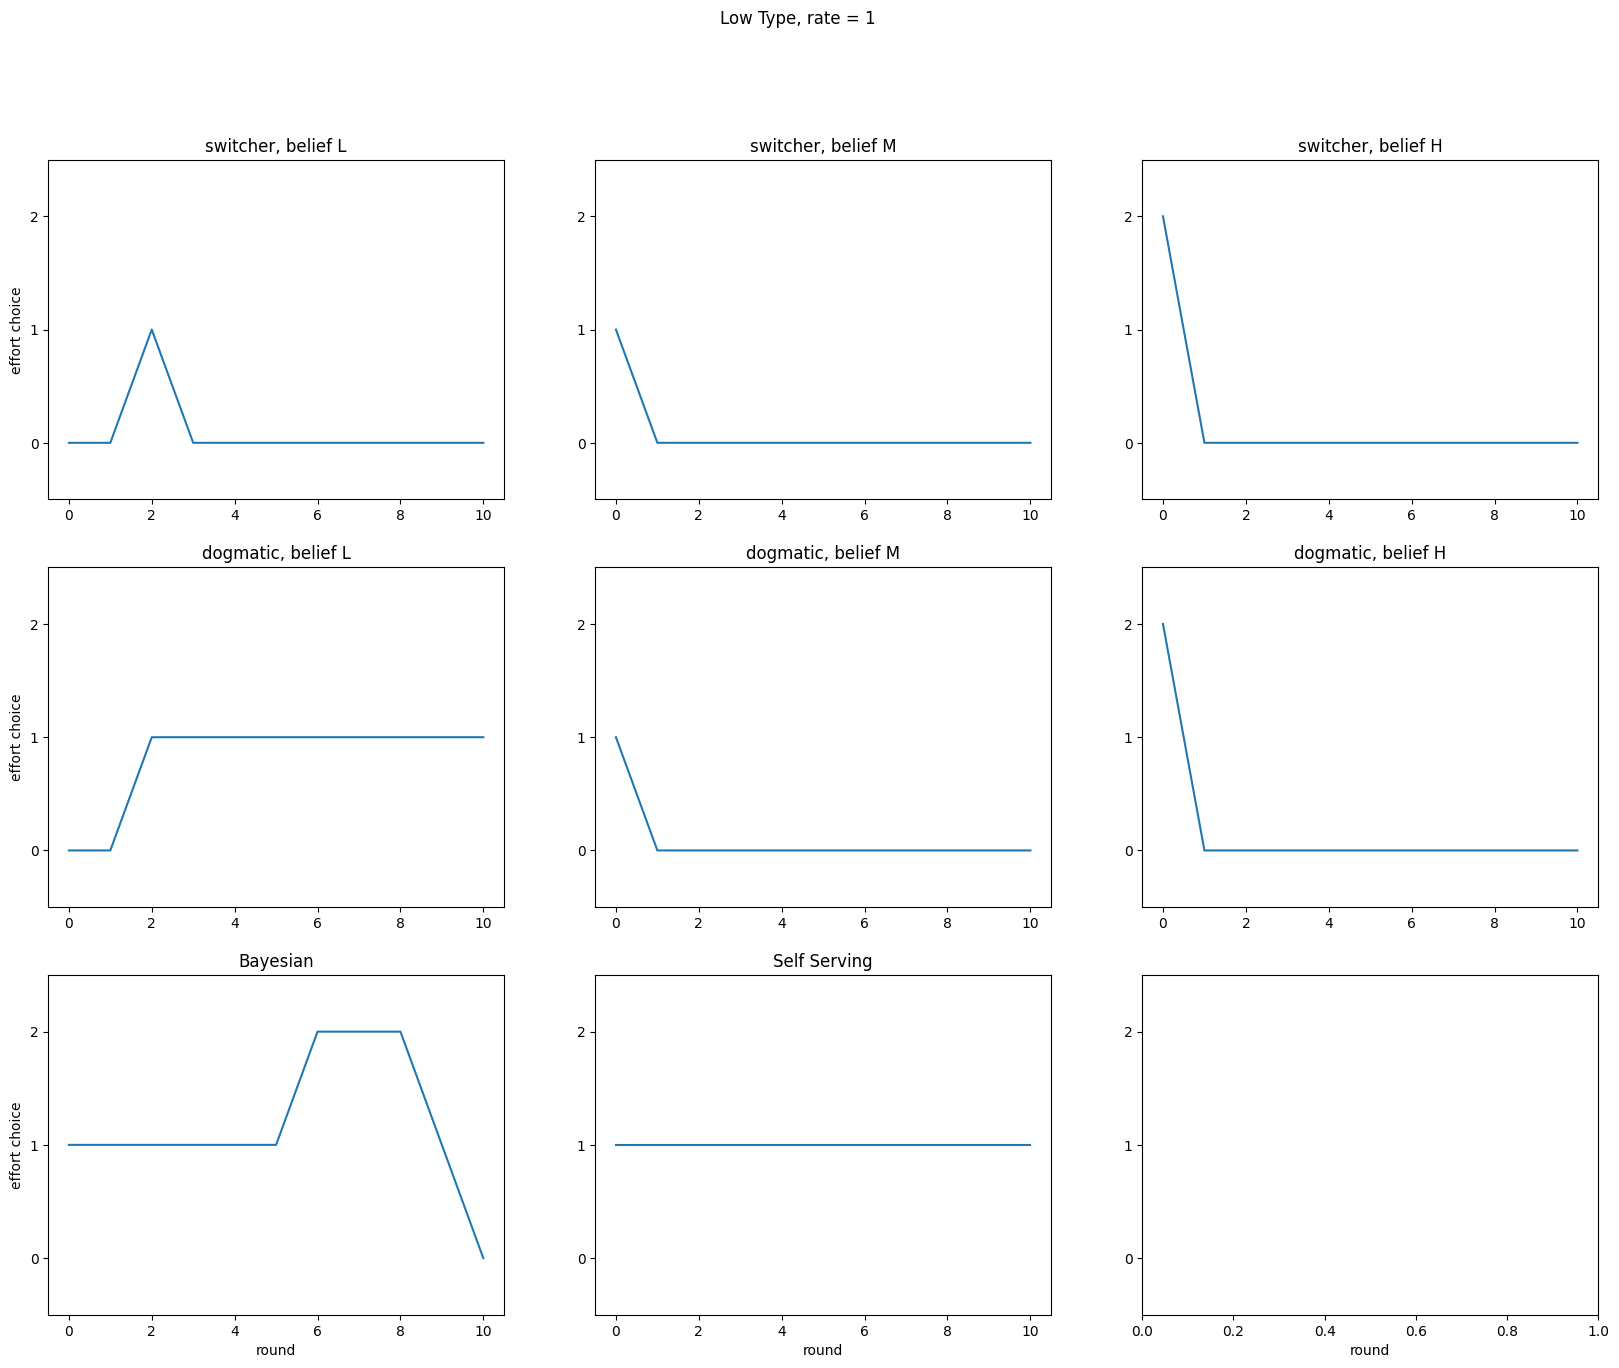

In [172]:
plot(choices_01, 0, 1)


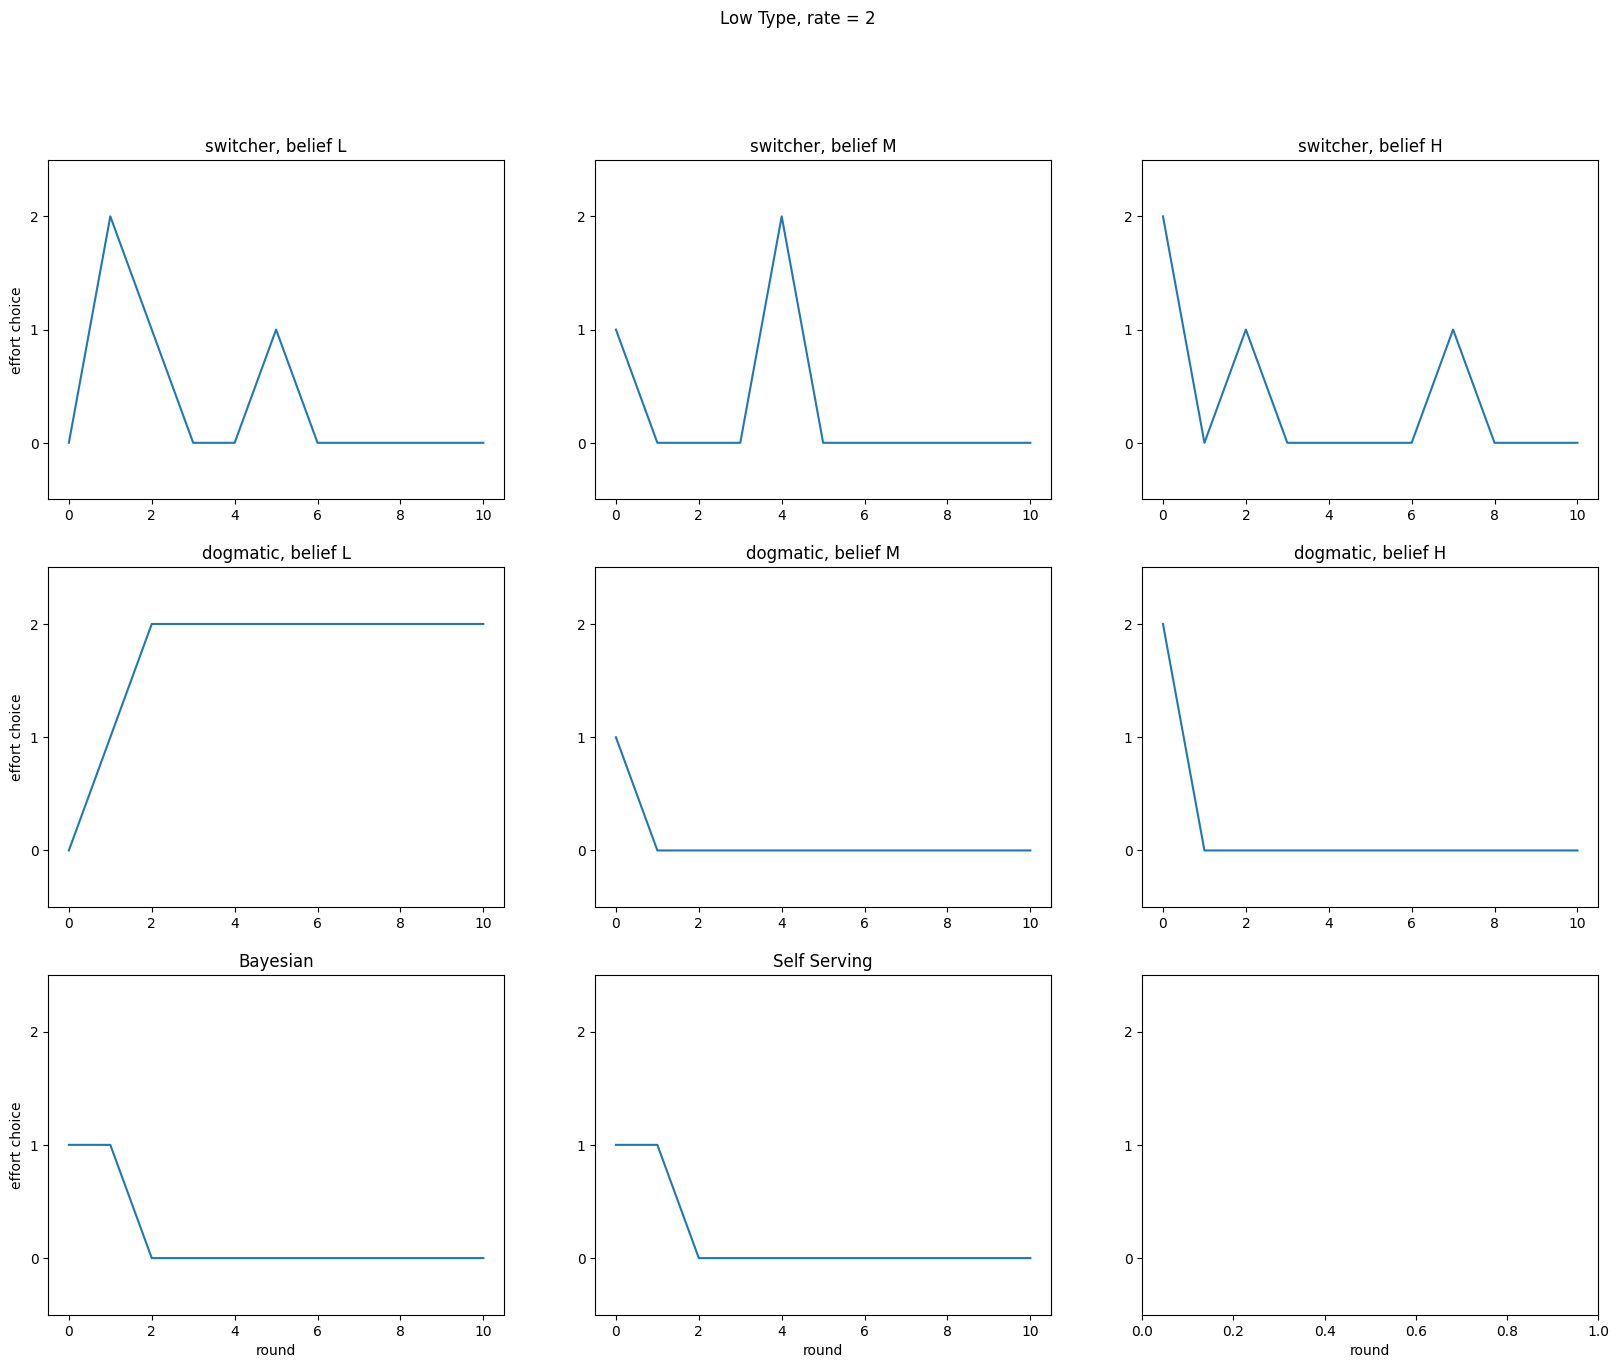

In [173]:
plot(choices_02, 0, 2)


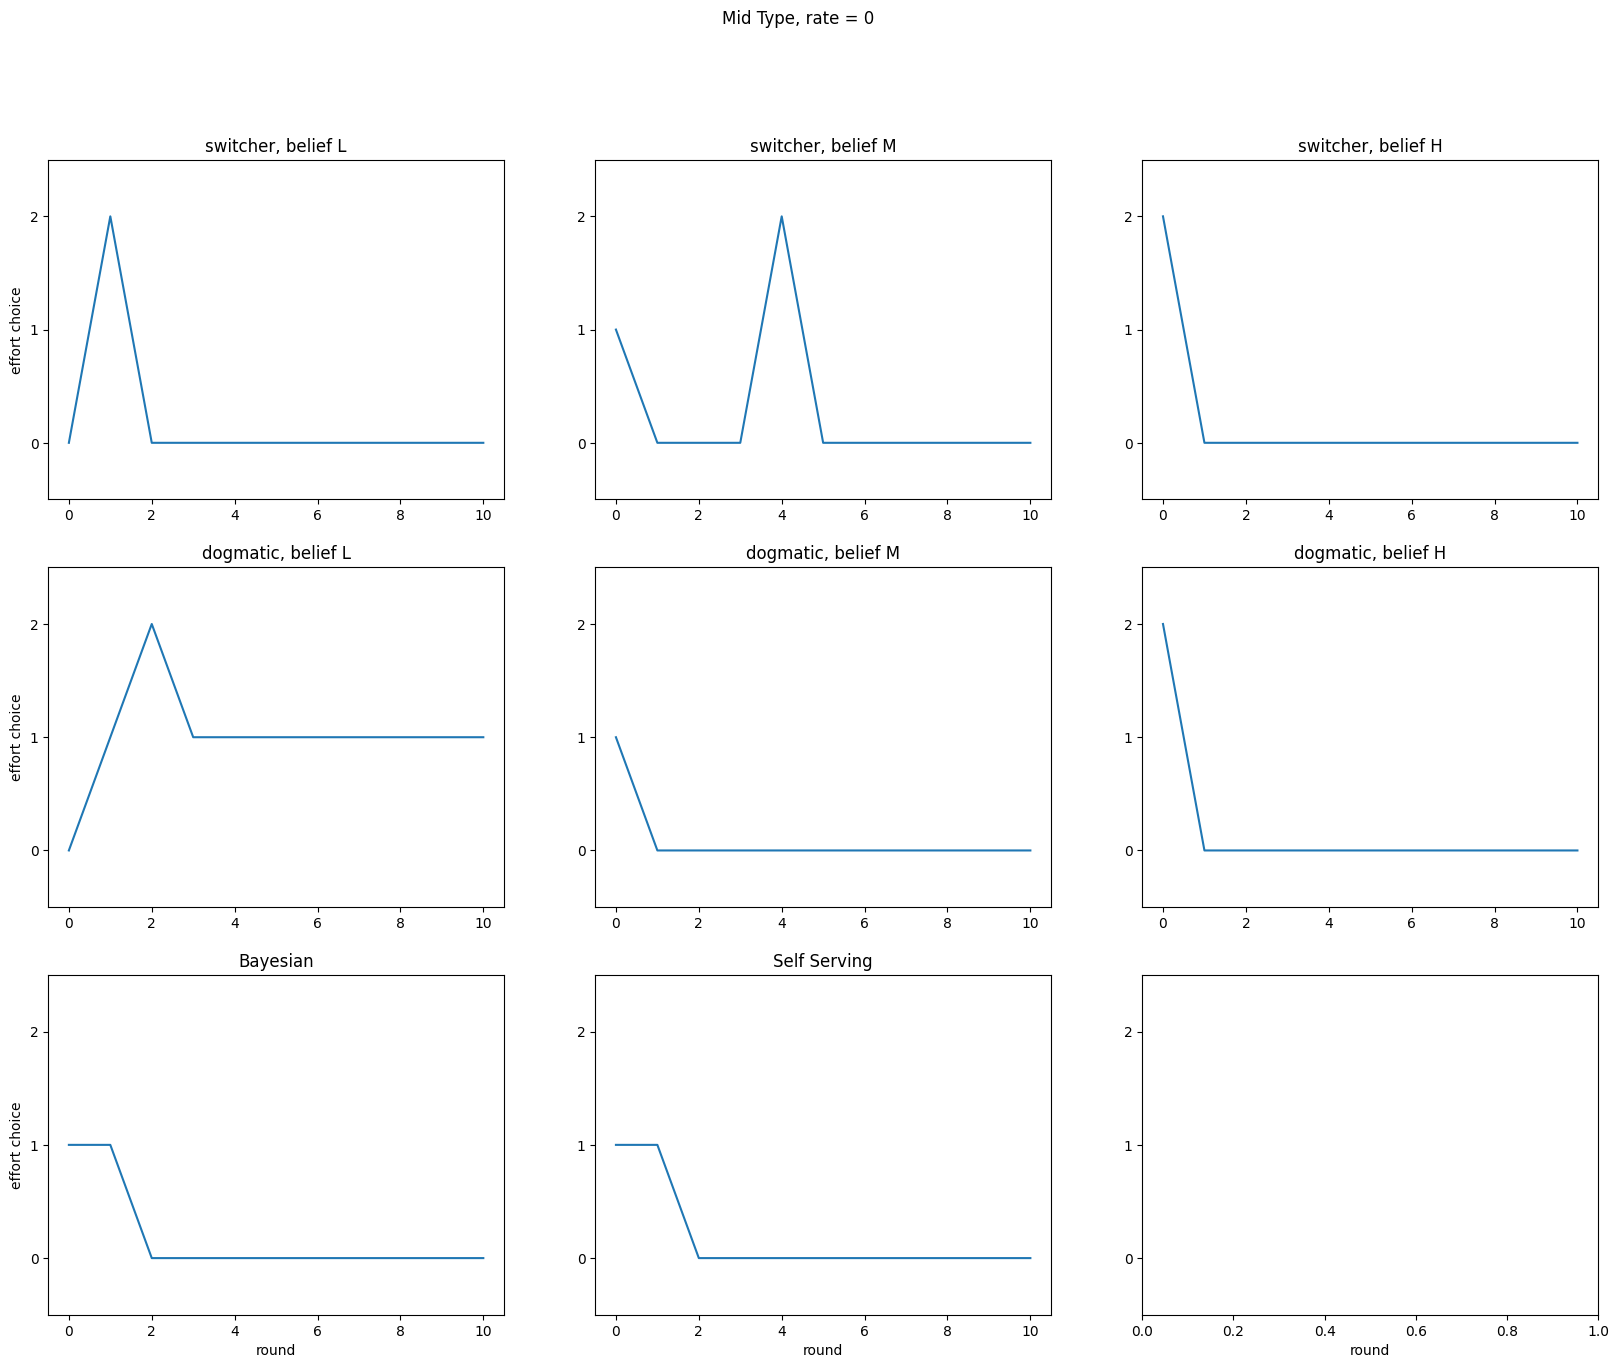

In [174]:
plot(choices_10, 1, 0)


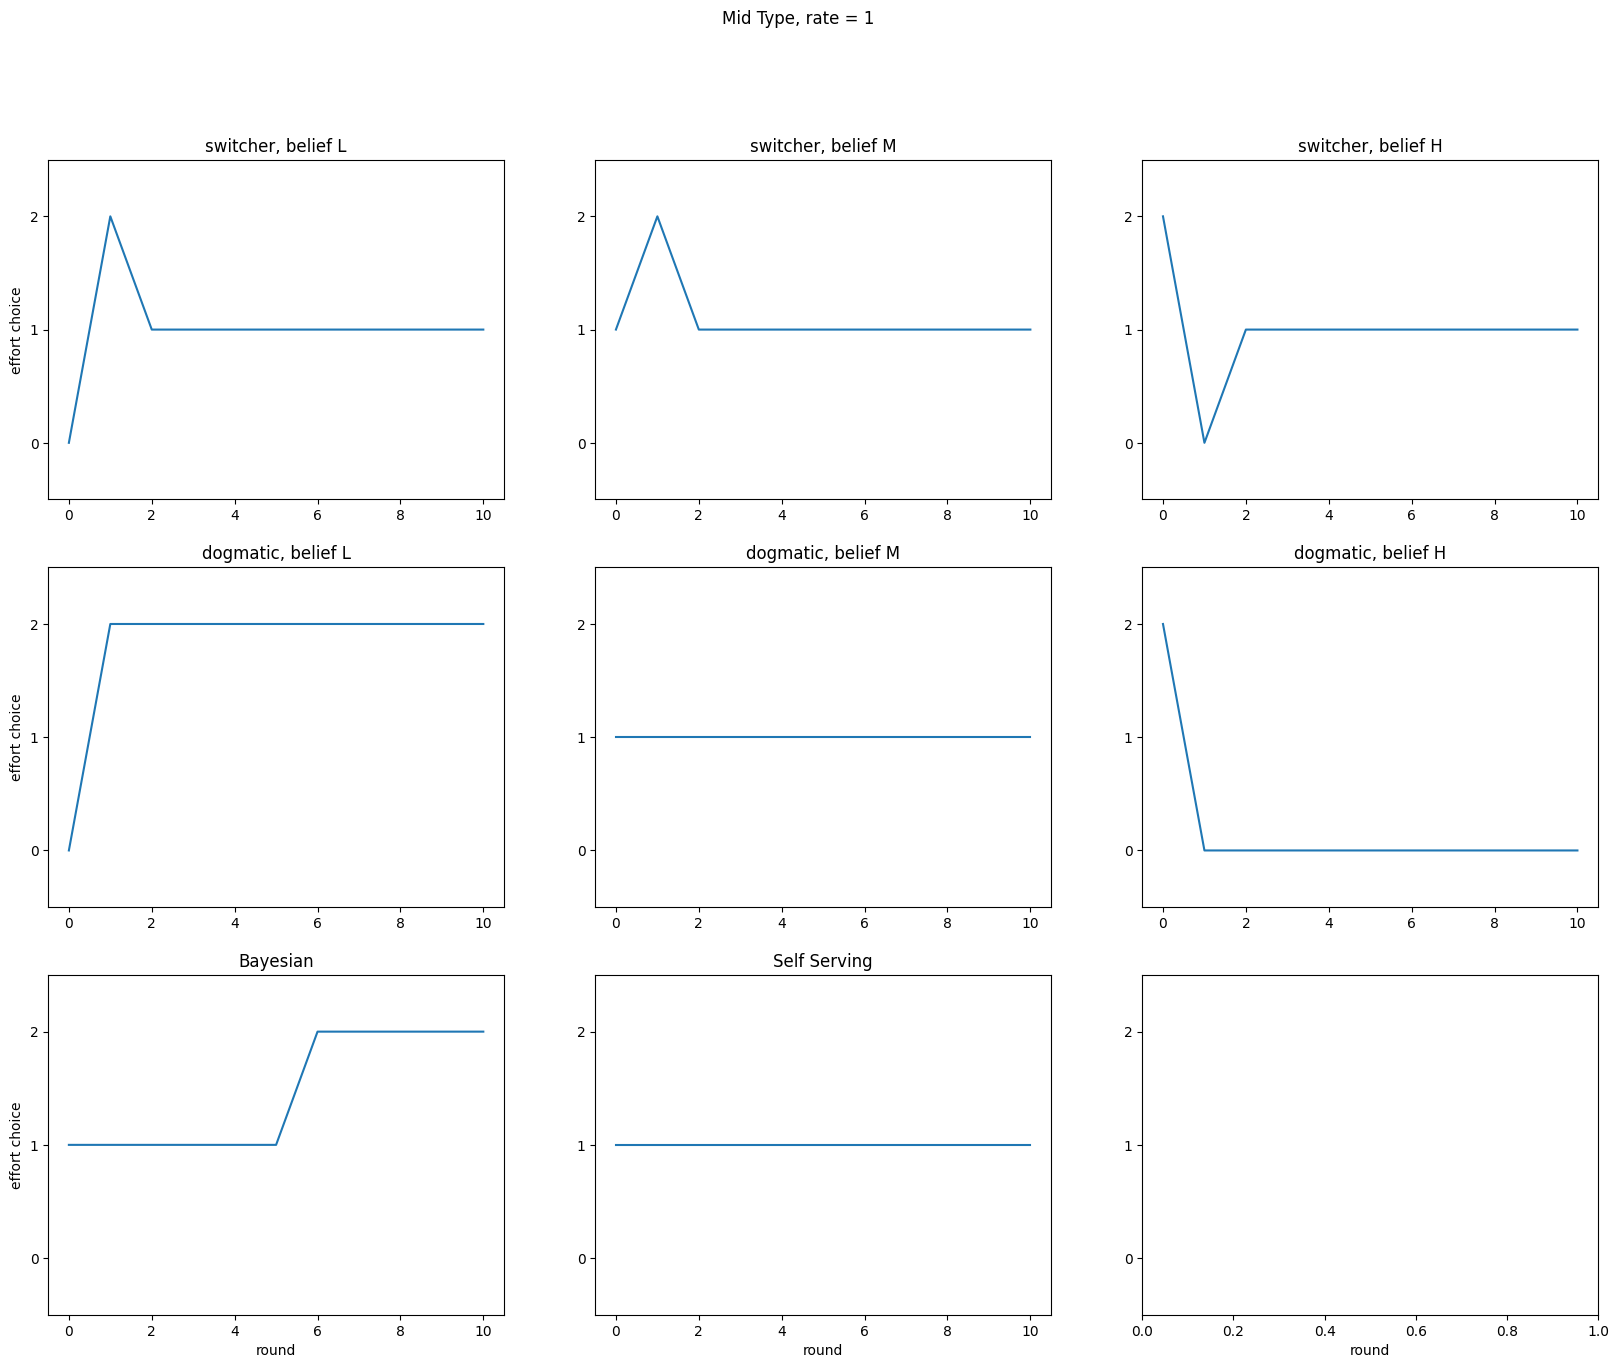

In [175]:
plot(choices_11, 1, 1)

plt.savefig('../Simulations/all_11.png')

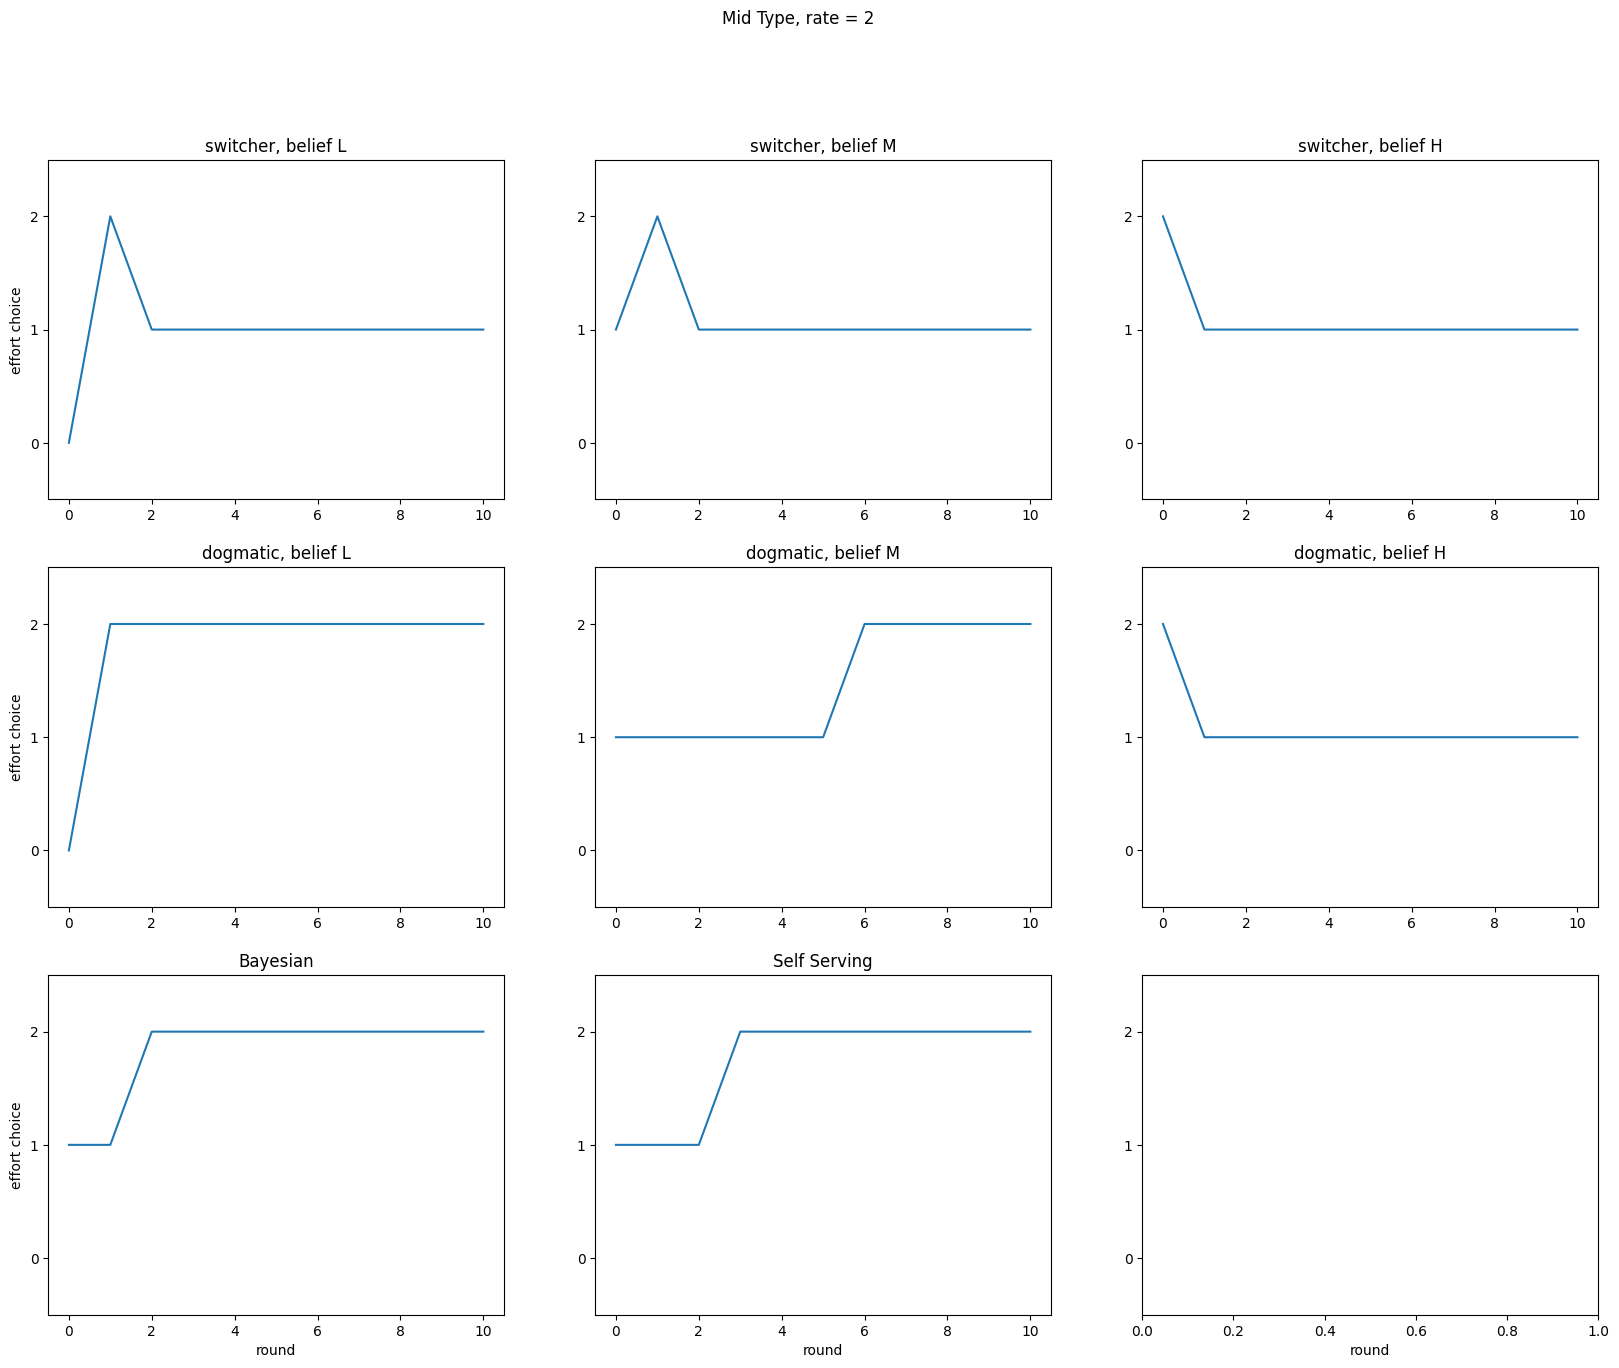

In [176]:
plot(choices_12, 1, 2)



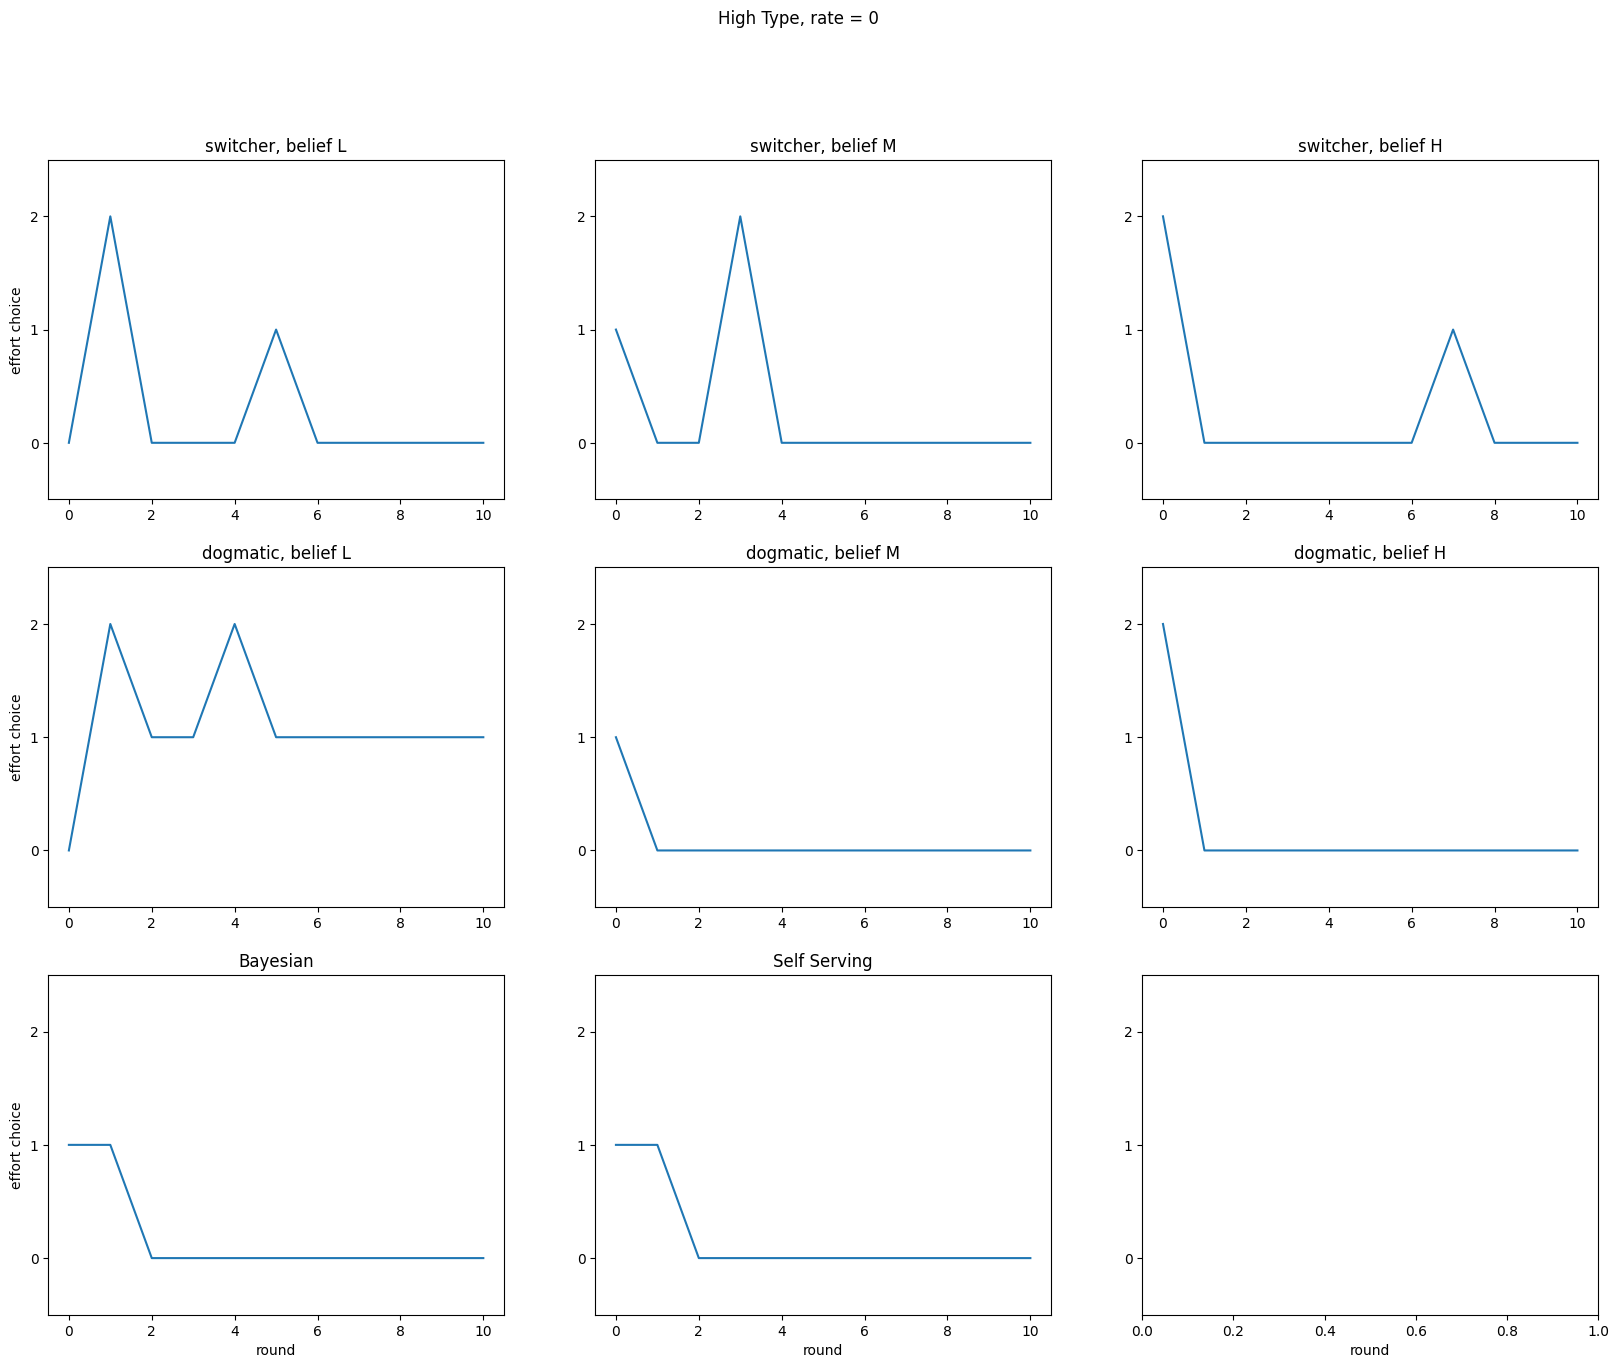

In [177]:
plot(choices_20, 2, 0)


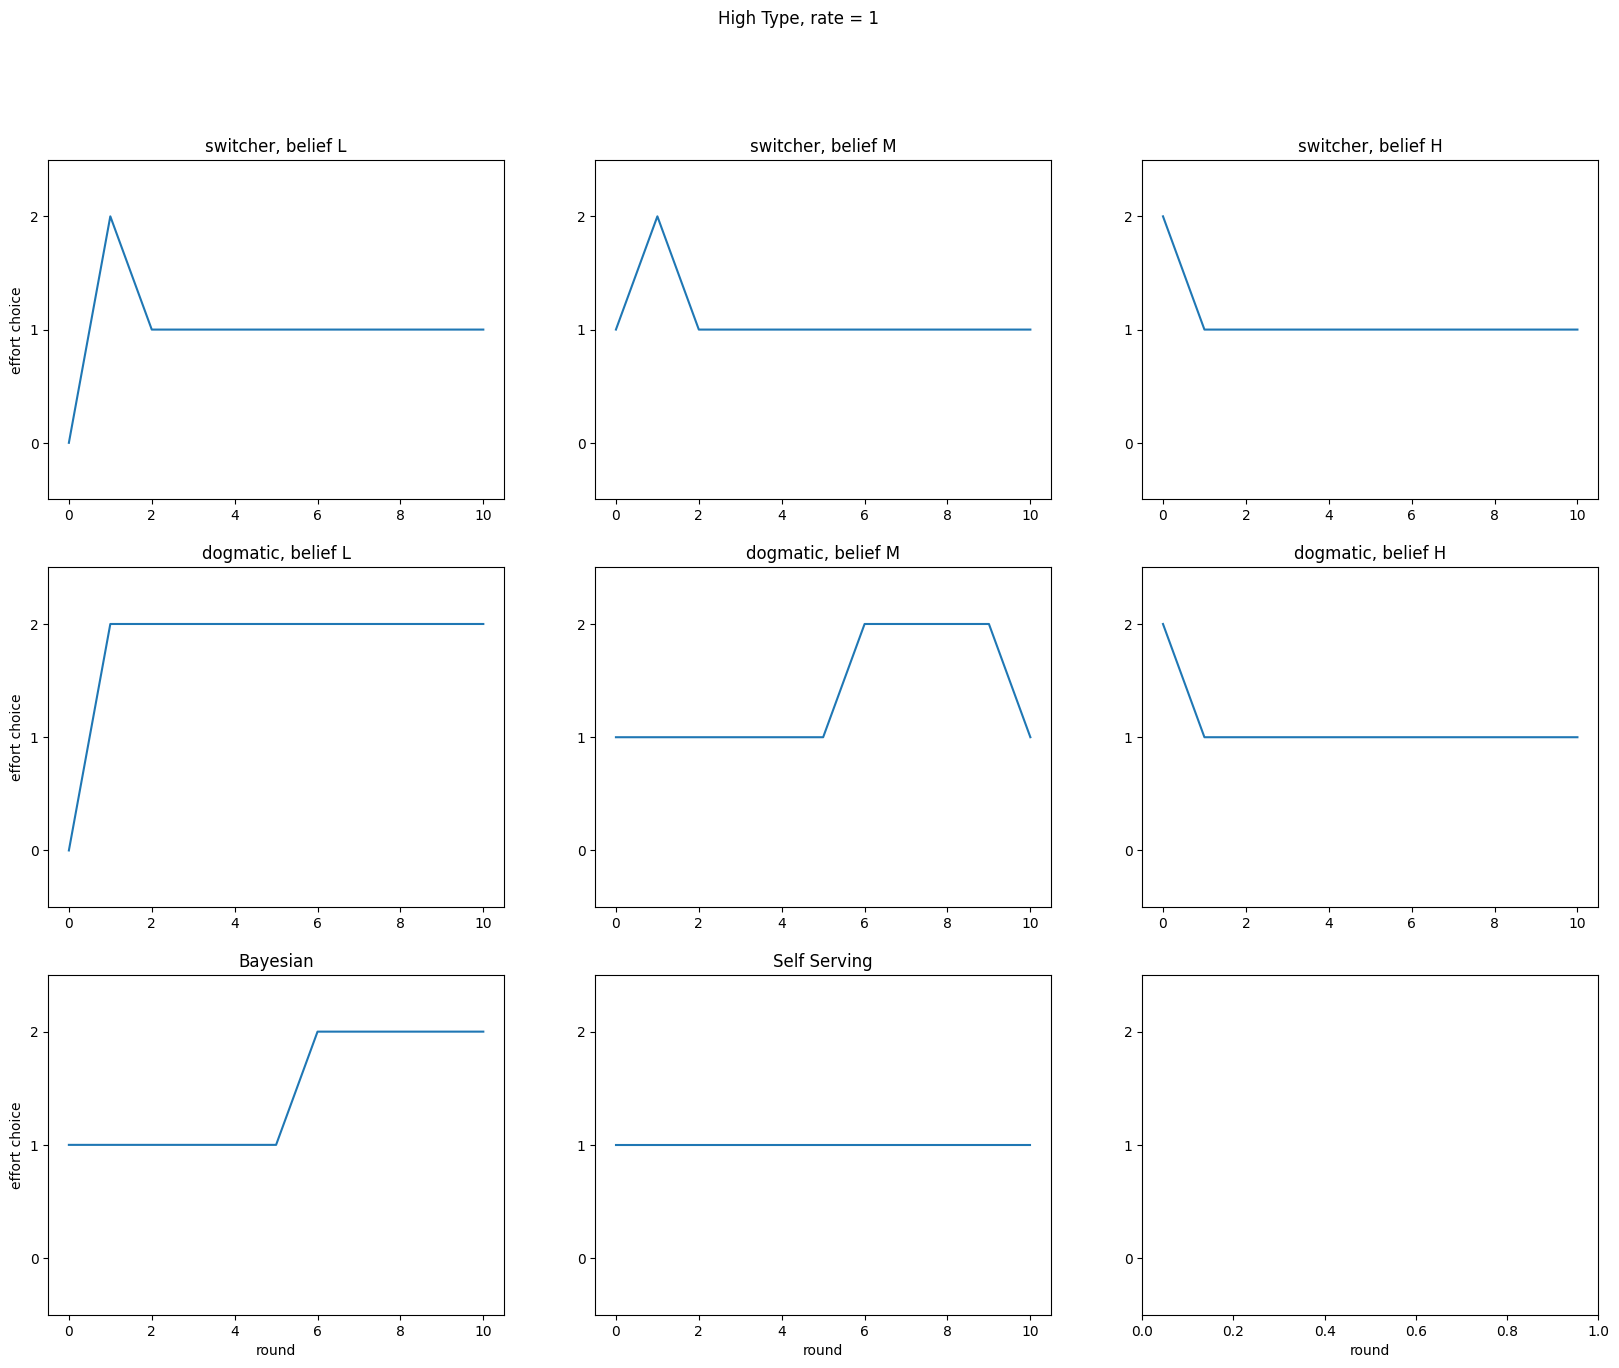

In [178]:
plot(choices_21, 2, 1)


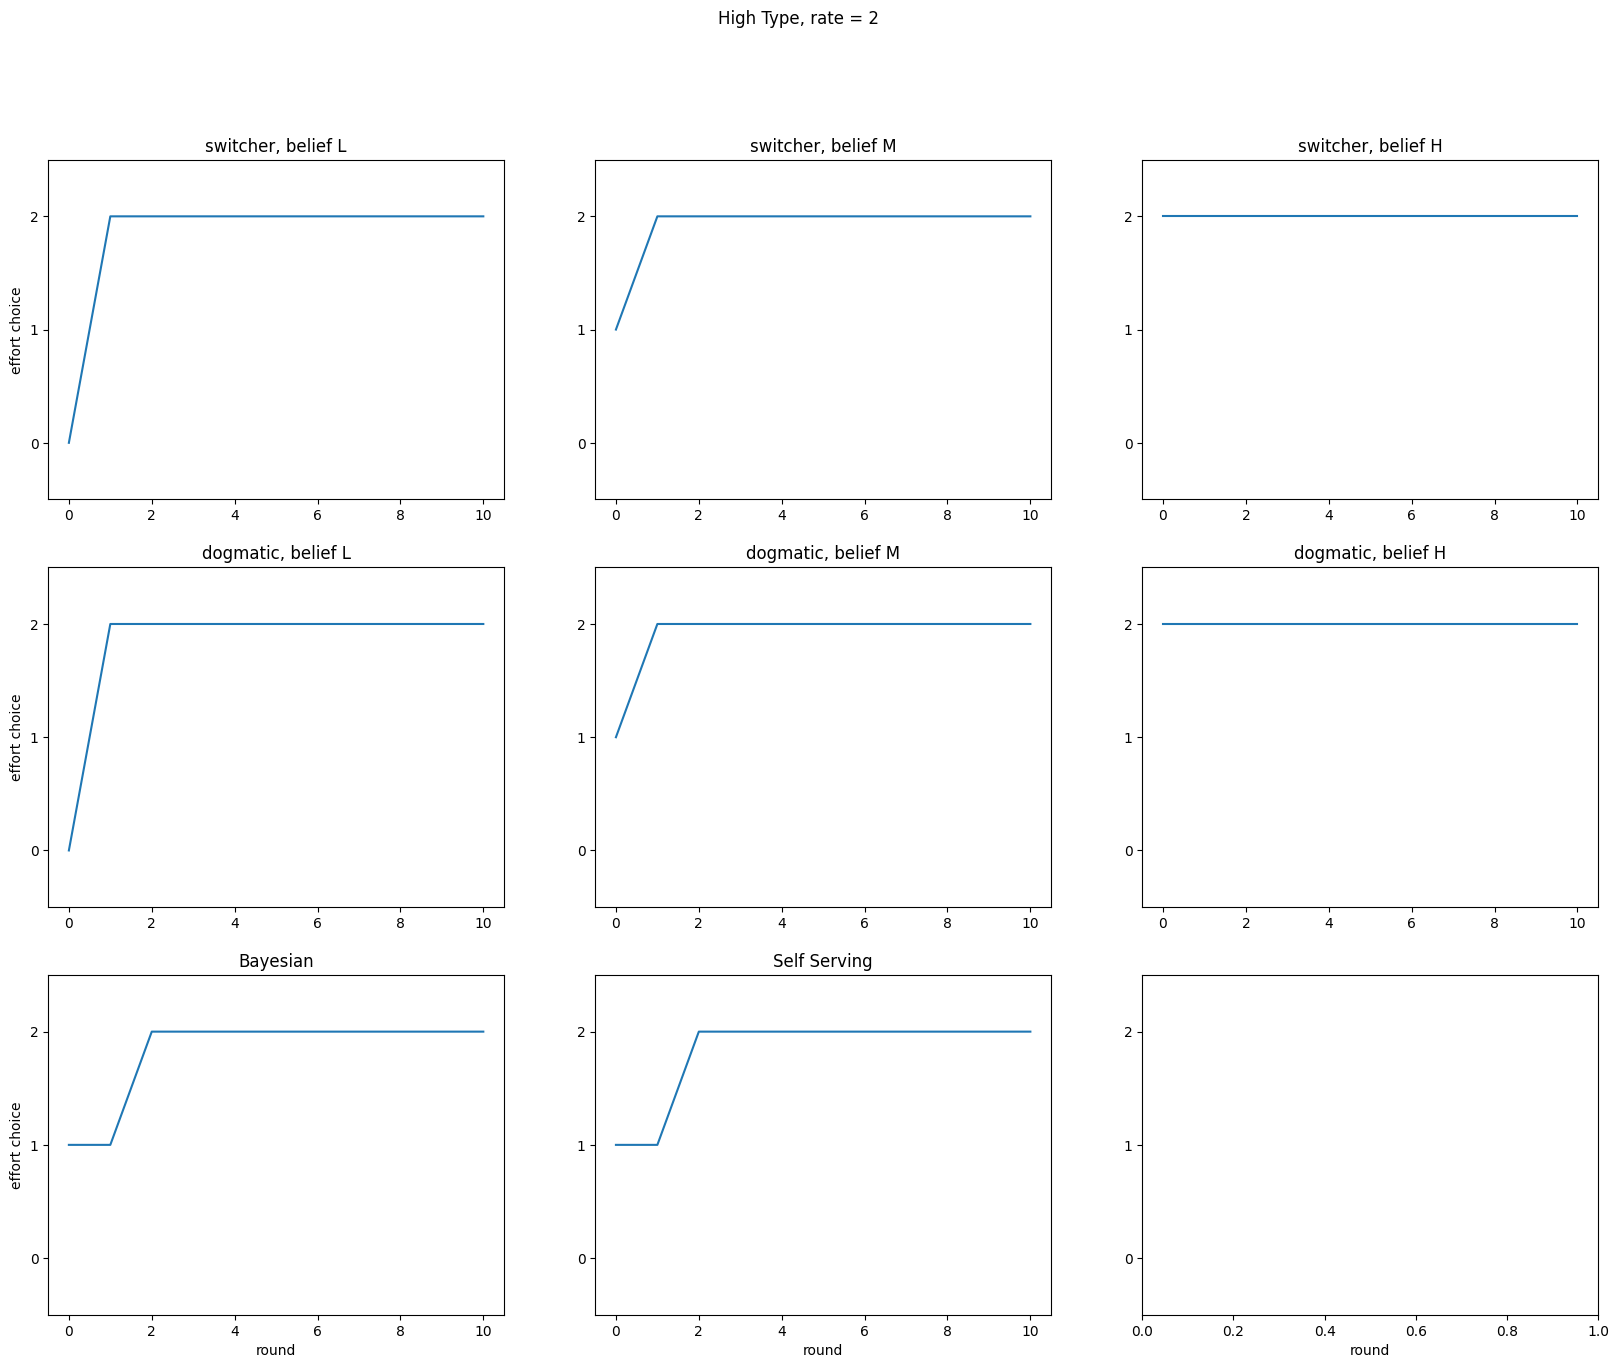

In [179]:
plot(choices_22, 2, 2)

In [180]:
# create a grid of parameters for the self-attribution bias (no base rate neglect yet)
values_high = np.linspace(.1, 2, num=10)
values_low = np.linspace(.1, 2, num=10)
C = []
for val1 in values_high:
    for val2 in values_low:
        for val3 in values_low:
            for val4 in values_high:
                C.append([val1, val2, val3, val4])


In [181]:
## simulate the self-attribution bias for all the  parameters
def simulate_ss_grid(theta, omega, p0_theta, p0_omega, M, c, d, T, N, trials, seeds, a, outcomes):
    #############
    # set empty vectors where all the data will be saved period by period for each of the models
    ############
    # beliefs

    signals = outcomes[theta]
    
    

    p_theta_ss =[p0_theta]
    p_omega_ss = [p0_omega]

    p_joint_biased = [np.kron(p_theta_ss[0], p_omega_ss[0])]
    
    # choices
    
    e_ss = [joint_bayes_c(p_joint_biased[0], M)]
    
    
    for t in range(T):

        # get the signals
        signal_ss = signals[e_ss[t], omega]
        
        # update beliefs
        p1 = joint_bayes_biased(p_joint_biased[t], signal_ss, M, e_ss[t], c)
        p_joint_biased.append(p1)
        
        
        # Choices
        e_ss_t = joint_bayes_c(p1, M)
        e_ss.append(e_ss_t)
        
    return e_ss

In [182]:
theta = 1
omega = 1
M = msc

periods = np.linspace(0, T, T+1)

ss_choices_params = []
ss_theta_params = []
ss_signals_params = []
ss_c = []



###### Determine the outcomes beforehand
# set a seed for each type
rng_H = np.random.default_rng(seed=seeds[0])
rng_M = np.random.default_rng(seed=seeds[1])
rng_L = np.random.default_rng(seed=seeds[2])

#############
# generate all the draws for T periods for each type and for each effort choice
############

##### for the high types
# outcomes after choosing L
outcome_H_L = rng_H.binomial(1, M[2][0, omega], size=(T, be_trials))
# outcomes after choosing M
outcome_H_M = rng_H.binomial(1, M[2][1, omega], size=(T, be_trials))
# outcomes after choosing H
outcome_H_H = rng_H.binomial(1, M[2][2, omega], size=(T, be_trials))

##### for the medium types
# after low effort
outcome_M_L = rng_M.binomial(1, M[1][0, omega], size=(T, be_trials))
# after medium effort
outcome_M_M = rng_M.binomial(1, M[1][1, omega], size=(T, be_trials))
# after high effort
outcome_M_H = rng_M.binomial(1, M[1][2, omega], size=(T, be_trials))

#### for the low types
outcomes_L_L = rng_L.binomial(1, M[0][0, omega], size=(T, be_trials))
outcomes_L_M = rng_L.binomial(1, M[0][1, omega], size=(T, be_trials))
outcomes_L_H = rng_L.binomial(1, M[0][2, omega], size=(T, be_trials))

# stack the outcome vectors foe each type into a matrix. first element is the effort choice, secod is t
outcomes_H = np.stack((outcome_H_L, outcome_H_M, outcome_H_H))
outcomes_M = np.stack((outcome_M_L, outcome_M_M, outcome_M_H))
outcomes_L = np.stack((outcomes_L_L, outcomes_L_M, outcomes_L_H))

# stack all the matrices into a single outcomes matrix of matrices
outcomes = np.stack((outcomes_L, outcomes_M, outcomes_H))


for c in C:
    e = simulate_ss_grid(theta, omega, [1/3,1/3, 1/3], [1/3,1/3, 1/3], msc, c, 1, T, 1, be_trials, seeds, a, outcomes)
    ss_choices_params.append(e)
    
    ss_c.append(c)
    
choices_df = pd.DataFrame(ss_choices_params, columns =[str(p) for p in periods])
parameters = pd.DataFrame(ss_c, columns = ['theta_good', 'theta_bad', 'omega_good', 'omega_bad'])

choices_params = pd.concat([parameters, choices_df], axis=1)

In [183]:
eb = simulate_ss_grid(theta, omega, [1/3,1/3, 1/3], [1/3,1/3, 1/3], msc, [1, 1, 1, 1], 1, T, 1, be_trials, seeds, a, outcomes)

In [184]:
long = choices_params.melt(id_vars=['theta_good', 'theta_bad', 'omega_good', 'omega_bad'] )
long.rename(columns={"variable":"round_number", "value":"choice"}, inplace=T)
long['round_number'] = long['round_number'].astype(float)

In [185]:
self_serving = long.loc[(long['theta_good']>long['theta_bad']) & (long['omega_good']<long['omega_bad']), :]
self_serving['ratio_theta'] = self_serving['theta_good']/self_serving['theta_bad']
self_serving['ratio_omega'] = self_serving['omega_good']/self_serving['omega_bad']

no_attribution = long.loc[(long['theta_good']==long['theta_bad']) & (long['omega_good']==long['omega_bad']), :]
no_attribution['ratio_theta'] = no_attribution['theta_good']/no_attribution['theta_bad']
no_attribution['ratio_omega'] = no_attribution['omega_good']/no_attribution['omega_bad']

/var/folders/fz/pp86wz7x4h514cs2lxtvtq3c0000gn/T/ipykernel_39240/2239621573.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self_serving['ratio_theta'] = self_serving['theta_good']/self_serving['theta_bad']
/var/folders/fz/pp86wz7x4h514cs2lxtvtq3c0000gn/T/ipykernel_39240/2239621573.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self_serving['ratio_omega'] = self_serving['omega_good']/self_serving['omega_bad']
/var/folders/fz/pp86wz7x4h514cs2lxtvtq3c0000gn/T/ipykernel_39240/2239621573.py:6: SettingW

In [186]:
omega_biases = np.sort(self_serving['ratio_omega'].unique())

In [187]:
self_serving

,theta_good,theta_bad,omega_good,omega_bad,round_number,choice,ratio_theta,ratio_omega
1001,0.311111,0.100000,0.100000,0.311111,0.0,1,3.111111,0.321429
1002,0.311111,0.100000,0.100000,0.522222,0.0,1,3.111111,0.191489
1003,0.311111,0.100000,0.100000,0.733333,0.0,1,3.111111,0.136364
1004,0.311111,0.100000,0.100000,0.944444,0.0,1,3.111111,0.105882
1005,0.311111,0.100000,0.100000,1.155556,0.0,1,3.111111,0.086538
...,...,...,...,...,...,...,...,...
109868,2.000000,1.788889,1.366667,1.788889,10.0,2,1.118012,0.763975
109869,2.000000,1.788889,1.366667,2.000000,10.0,2,1.118012,0.683333
109878,2.000000,1.788889,1.577778,1.788889,10.0,2,1.118012,0.881988
109879,2.000000,1.788889,1.577778,2.000000,10.0,2,1.118012,0.788889


In [188]:
self_serving['theta_good'].unique()

array([0.31111111, 0.52222222, 0.73333333, 0.94444444, 1.15555556,
       1.36666667, 1.57777778, 1.78888889, 2.        ])

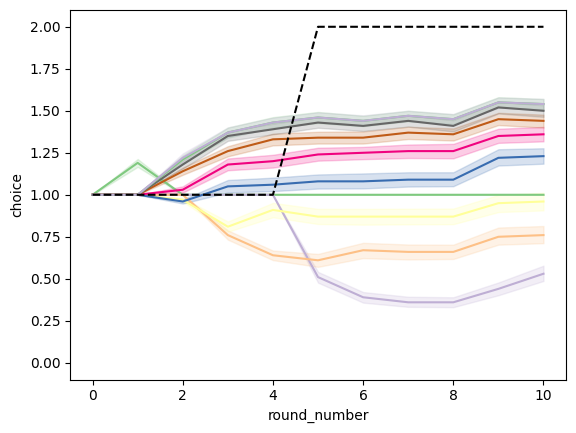

In [189]:
sns.lineplot(data=long, 
             x="round_number", 
             y='choice', 
             hue='theta_good', 
             palette = 'Accent',
             legend=False)

plt.plot(eb, color='black', linestyle='--')
plt.ylim(-.1, 2.1)
# save
plt.savefig('../figures/self-serving_11.png')


/var/folders/fz/pp86wz7x4h514cs2lxtvtq3c0000gn/T/ipykernel_39240/892923644.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=self_serving[self_serving['ratio_theta']<.7],


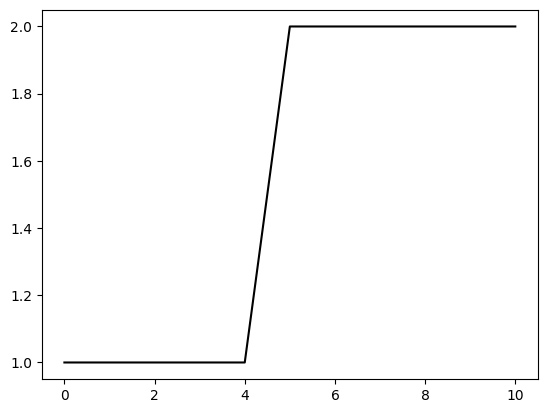

In [190]:
sns.lineplot(data=self_serving[self_serving['ratio_theta']<.7], 
             x="round_number", 
             y='choice',  
             palette = 'tab10')

plt.plot(eb, color='black')

In [191]:
choices_00

[[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
 [0, 1, 5, 0, 3, 1, 2, 2, 0, 2, 0],
 [0, 0, 5, 2, 3, 1, 2, 2, 0, 2, 0],
 [0, 0, 5, 2, 3, 1, 2, 2, 0, 2, 0],
 [0, 1, 5, 0, 3, 1, 2, 2, 0, 2, 0],
 [0, 0, 5, 2, 3, 1, 2, 2, 0, 2, 0],
 [0, 0, 5, 2, 3, 1, 2, 2, 0, 2, 0],
 [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]]

In [192]:
# turn the choices_tw tables into a single data set by adding a column for the parameter values
df_00 = pd.DataFrame(np.array(choices_00).transpose(), 
             columns = ['e_lr_L', 'e_lr_M', 'e_lr_H', 
                        'e_dog_L', 'e_dog_M', 'e_dog_H', 
                        'e_bay', 'e_ss', 'e_joint_bay', 'e_joint_biased',
                        'theta_lr_L', 'theta_lr_M', 'theta_lr_H', 
                        'signals_ss', 
                        'signals_lr_L', 'signals_lr_M', 'signals_lr_H', 
                        'signals_dog_L', 'signals_dog_M', 'signals_dog_H', 
                        'signals_bay'])

df_00['theta'] = 0
df_00['omega'] = 0

# add a column called round_number that ranges from 0 to T 
df_00['round_number'] = np.linspace(0, T, T+1)

df_01 = pd.DataFrame(np.array(choices_01).transpose(),  
             columns = ['e_lr_L', 'e_lr_M', 'e_lr_H', 
                        'e_dog_L', 'e_dog_M', 'e_dog_H', 
                        'e_bay', 'e_ss', 'e_joint_bay', 'e_joint_biased',
                        'theta_lr_L', 'theta_lr_M', 'theta_lr_H', 
                        'signals_ss', 
                        'signals_lr_L', 'signals_lr_M', 'signals_lr_H', 
                        'signals_dog_L', 'signals_dog_M', 'signals_dog_H', 
                        'signals_bay'])
df_01['theta'] = 0
df_01['omega'] = 1

# add a column called round_number that ranges from 0 to T 
df_01['round_number'] = np.linspace(0, T, T+1)

df_02 = pd.DataFrame(np.array(choices_02).transpose(),
                columns = ['e_lr_L', 'e_lr_M', 'e_lr_H', 
                        'e_dog_L', 'e_dog_M', 'e_dog_H', 
                        'e_bay', 'e_ss', 'e_joint_bay', 'e_joint_biased',
                        'theta_lr_L', 'theta_lr_M', 'theta_lr_H', 
                        'signals_ss', 
                        'signals_lr_L', 'signals_lr_M', 'signals_lr_H', 
                        'signals_dog_L', 'signals_dog_M', 'signals_dog_H', 
                        'signals_bay'])
df_02['theta'] = 0
df_02['omega'] = 2

# add a column called round_number that ranges from 0 to T 
df_02['round_number'] = np.linspace(0, T, T+1)

df_10 = pd.DataFrame(np.array(choices_10).transpose(),
                columns = ['e_lr_L', 'e_lr_M', 'e_lr_H', 
                        'e_dog_L', 'e_dog_M', 'e_dog_H', 
                        'e_bay', 'e_ss', 'e_joint_bay', 'e_joint_biased',
                        'theta_lr_L', 'theta_lr_M', 'theta_lr_H', 
                        'signals_ss', 
                        'signals_lr_L', 'signals_lr_M', 'signals_lr_H', 
                        'signals_dog_L', 'signals_dog_M', 'signals_dog_H', 
                        'signals_bay'])
df_10['theta'] = 1
df_10['omega'] = 0

# add a column called round_number that ranges from 0 to T 
df_10['round_number'] = np.linspace(0, T, T+1)

df_11 = pd.DataFrame(np.array(choices_11).transpose(),
                columns = ['e_lr_L', 'e_lr_M', 'e_lr_H', 
                        'e_dog_L', 'e_dog_M', 'e_dog_H', 
                        'e_bay', 'e_ss', 'e_joint_bay', 'e_joint_biased',
                        'theta_lr_L', 'theta_lr_M', 'theta_lr_H', 
                        'signals_ss', 
                        'signals_lr_L', 'signals_lr_M', 'signals_lr_H', 
                        'signals_dog_L', 'signals_dog_M', 'signals_dog_H', 
                        'signals_bay'])
df_11['theta'] = 1
df_11['omega'] = 1

# add a column called round_number that ranges from 0 to T 
df_11['round_number'] = np.linspace(0, T, T+1)

df_12 = pd.DataFrame(np.array(choices_12).transpose(),
                columns = ['e_lr_L', 'e_lr_M', 'e_lr_H', 
                        'e_dog_L', 'e_dog_M', 'e_dog_H', 
                        'e_bay', 'e_ss', 'e_joint_bay', 'e_joint_biased',
                        'theta_lr_L', 'theta_lr_M', 'theta_lr_H', 
                        'signals_ss', 
                        'signals_lr_L', 'signals_lr_M', 'signals_lr_H', 
                        'signals_dog_L', 'signals_dog_M', 'signals_dog_H', 
                        'signals_bay'])
df_12['theta'] = 1  
df_12['omega'] = 2

# add a column called round_number that ranges from 0 to T 
df_12['round_number'] = np.linspace(0, T, T+1)

df_20 = pd.DataFrame(np.array(choices_20).transpose(),
                columns = ['e_lr_L', 'e_lr_M', 'e_lr_H', 
                        'e_dog_L', 'e_dog_M', 'e_dog_H', 
                        'e_bay', 'e_ss', 'e_joint_bay', 'e_joint_biased',
                        'theta_lr_L', 'theta_lr_M', 'theta_lr_H', 
                        'signals_ss', 
                        'signals_lr_L', 'signals_lr_M', 'signals_lr_H', 
                        'signals_dog_L', 'signals_dog_M', 'signals_dog_H', 
                        'signals_bay'])
df_20['theta'] = 2
df_20['omega'] = 0

# add a column called round_number that ranges from 0 to T 
df_20['round_number'] = np.linspace(0, T, T+1)

df_21 = pd.DataFrame(np.array(choices_21).transpose(),
                columns = ['e_lr_L', 'e_lr_M', 'e_lr_H', 
                        'e_dog_L', 'e_dog_M', 'e_dog_H', 
                        'e_bay', 'e_ss', 'e_joint_bay', 'e_joint_biased',
                        'theta_lr_L', 'theta_lr_M', 'theta_lr_H', 
                        'signals_ss', 
                        'signals_lr_L', 'signals_lr_M', 'signals_lr_H', 
                        'signals_dog_L', 'signals_dog_M', 'signals_dog_H', 
                        'signals_bay'])
df_21['theta'] = 2
df_21['omega'] = 1

# add a column called round_number that ranges from 0 to T 
df_21['round_number'] = np.linspace(0, T, T+1)

df_22 = pd.DataFrame(np.array(choices_22).transpose(),
                columns = ['e_lr_L', 'e_lr_M', 'e_lr_H', 
                        'e_dog_L', 'e_dog_M', 'e_dog_H', 
                        'e_bay', 'e_ss', 'e_joint_bay', 'e_joint_biased',
                        'theta_lr_L', 'theta_lr_M', 'theta_lr_H', 
                        'signals_ss', 
                        'signals_lr_L', 'signals_lr_M', 'signals_lr_H', 
                        'signals_dog_L', 'signals_dog_M', 'signals_dog_H', 
                        'signals_bay'])
df_22['theta'] = 2
df_22['omega'] = 2

# add a column called round_number that ranges from 0 to T 
df_22['round_number'] = np.linspace(0, T, T+1)

choices_all = pd.concat([df_00, df_01, df_02, df_10, df_11, df_12, df_20, df_21, df_22], axis=0)

In [193]:
choices_all.columns

Index(['e_lr_L', 'e_lr_M', 'e_lr_H', 'e_dog_L', 'e_dog_M', 'e_dog_H', 'e_bay',
       'e_ss', 'e_joint_bay', 'e_joint_biased', 'theta_lr_L', 'theta_lr_M',
       'theta_lr_H', 'signals_ss', 'signals_lr_L', 'signals_lr_M',
       'signals_lr_H', 'signals_dog_L', 'signals_dog_M', 'signals_dog_H',
       'signals_bay', 'theta', 'omega', 'round_number'],
      dtype='object')

In [194]:
from pathlib import Path  
filepath = Path('demo/data/simulation.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
choices_all.to_csv(filepath)


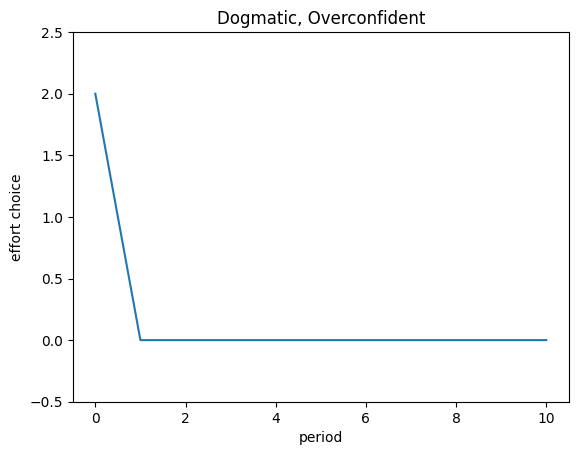

In [195]:
# plots for slides
# dogmatic
plt.plot(choices_11[5])
plt.title('Dogmatic, Overconfident')
plt.ylim(-.5, 2.5)
plt.ylabel('effort choice')
plt.xlabel('period')

plt.savefig('../Simulations/dogmatic_over_11.png')

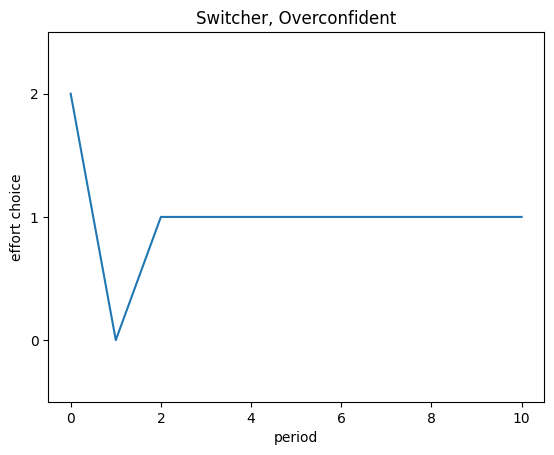

In [196]:
# plots for slides
# switcher
plt.plot(choices_11[2])
plt.title('Switcher, Overconfident')
plt.ylim(-.5, 2.5)
plt.ylabel('effort choice')
plt.xlabel('period')
plt.yticks([0, 1, 2])

plt.savefig('../Simulations/switcher_over_11.png')

In [197]:
def plot(choices, theta, omega):
    
    fig, axs = plt.subplots(3, 3, figsize=(20, 15))
    axs[0,0].plot(choices[0])
    axs[0,1].plot(choices[1])
    axs[0,2].plot(choices[2])
    # plot the belief of type for the switcher
    #axs[0,0].plot(choices[8])
    #axs[0,1].plot(choices[9])
    #axs[0,2].plot(choices[10])
    
    axs[0, 0].set_title('switcher, belief L')
    axs[0, 1].set_title('switcher, belief M')
    axs[0, 2].set_title('switcher, belief H')

    axs[1,0].plot(choices[3])
    axs[1,1].plot(choices[4])
    axs[1,2].plot(choices[5])
    
    axs[1, 0].set_title('dogmatic, belief L')
    axs[1, 1].set_title('dogmatic, belief M')
    axs[1, 2].set_title('dogmatic, belief H')

    axs[2,0].plot(choices[6])
    axs[2,1].plot(choices[7])
    axs[2,1].plot(choices[8])
    
    axs[2, 0].set_title('Bayesian')
    axs[2, 1].set_title('Self Serving')
    axs[2, 2].set_title('Bayesian Joint')
    
    axs[0, 0].set_ylim(-0.5, 2.5)
    axs[0, 1].set_ylim(-.5, 2.5)
    axs[0, 2].set_ylim(-.5, 2.5)
    axs[1, 0].set_ylim(-.5, 2.5)
    axs[1, 1].set_ylim(-.5, 2.5)
    axs[1, 2].set_ylim(-.5, 2.5)
    axs[2, 0].set_ylim(-.5, 2.5)
    axs[2, 1].set_ylim(-.5, 2.5)
    axs[2, 2].set_ylim(-.5, 2.5)

    if theta == 1:
        type = 'Mid Type'
    if theta ==0:
        type = 'Low Type'
    if theta ==2:
        type = 'High Type'

    axs[2,0].set_xlabel('round')
    axs[2,1].set_xlabel('round')
    axs[2,2].set_xlabel('round')

    axs[0, 0].set_ylabel('effort choice')
    axs[1, 0].set_ylabel('effort choice')
    axs[2, 0].set_ylabel('effort choice')

    axs[0, 0].set_yticks([0, 1, 2])
    axs[1, 0].set_yticks([0, 1, 2])
    axs[2, 0].set_yticks([0, 1, 2])

    axs[0, 1].set_yticks([0, 1, 2])
    axs[1, 1].set_yticks([0, 1, 2])
    axs[2, 1].set_yticks([0, 1, 2])

    axs[0, 2].set_yticks([0, 1, 2])
    axs[1, 2].set_yticks([0, 1, 2])
    axs[2, 2].set_yticks([0, 1, 2])
    
    fig.suptitle(type + ', rate = '+str(omega))

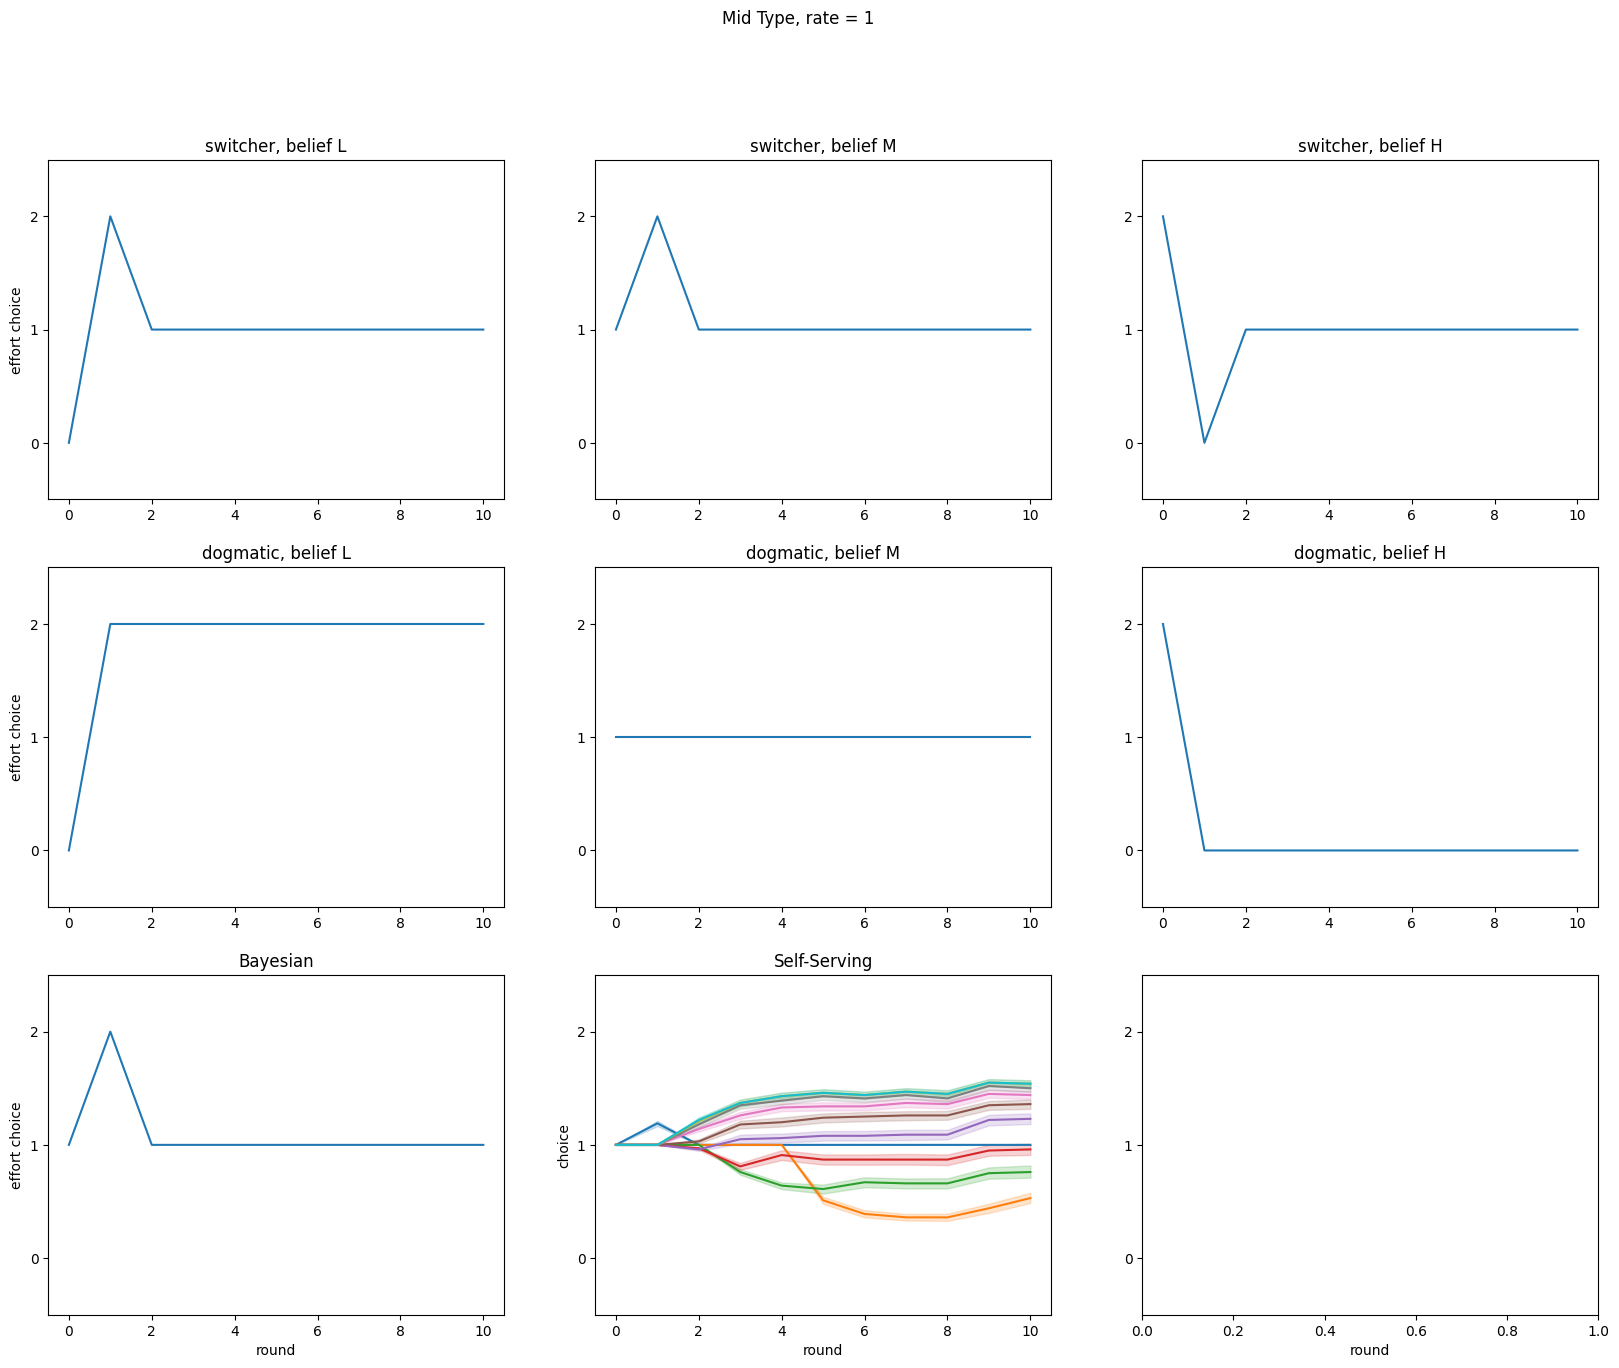

In [198]:

    
fig, axs = plt.subplots(3, 3, figsize=(20, 15))
axs[0,0].plot(choices_11[0])
axs[0,1].plot(choices_11[1])
axs[0,2].plot(choices_11[2])
    # plot the belief of type for the switcher
    #axs[0,0].plot(choices[8])
    #axs[0,1].plot(choices[9])
    #axs[0,2].plot(choices[10])
    
axs[0, 0].set_title('switcher, belief L')
axs[0, 1].set_title('switcher, belief M')
axs[0, 2].set_title('switcher, belief H')

axs[1,0].plot(choices_11[3])
axs[1,1].plot(choices_11[4])
axs[1,2].plot(choices_11[5])
    
axs[1, 0].set_title('dogmatic, belief L')
axs[1, 1].set_title('dogmatic, belief M')
axs[1, 2].set_title('dogmatic, belief H')

axs[2,0].plot(choices_11[6])
sns.lineplot(data=long, 
             x="round_number", 
             y='choice', 
             hue='theta_good', 
             palette = 'tab10', ax=axs[2, 1])

    
axs[2, 0].set_title('Bayesian')
axs[2, 1].set_title('Self-Serving')
    
axs[0, 0].set_ylim(-0.5, 2.5)
axs[0, 1].set_ylim(-.5, 2.5)
axs[0, 2].set_ylim(-.5, 2.5)
axs[1, 0].set_ylim(-.5, 2.5)
axs[1, 1].set_ylim(-.5, 2.5)
axs[1, 2].set_ylim(-.5, 2.5)
axs[2, 0].set_ylim(-.5, 2.5)
axs[2, 1].set_ylim(-.5, 2.5)
axs[2, 2].set_ylim(-.5, 2.5)

if theta == 1:
    type = 'Mid Type'
if theta ==0:
    type = 'Low Type'
if theta ==2:
        type = 'High Type'

axs[2,0].set_xlabel('round')
axs[2,1].set_xlabel('round')
axs[2,2].set_xlabel('round')

axs[0, 0].set_ylabel('effort choice')
axs[1, 0].set_ylabel('effort choice')
axs[2, 0].set_ylabel('effort choice')

axs[0, 0].set_yticks([0, 1, 2])
axs[1, 0].set_yticks([0, 1, 2])
axs[2, 0].set_yticks([0, 1, 2])

axs[0, 1].set_yticks([0, 1, 2])
axs[1, 1].set_yticks([0, 1, 2])
axs[2, 1].set_yticks([0, 1, 2])

axs[0, 2].set_yticks([0, 1, 2])
axs[1, 2].set_yticks([0, 1, 2])
axs[2, 2].set_yticks([0, 1, 2])

axs[2, 1].legend([],[], frameon=False)
    
fig.suptitle(type + ', rate = '+str(omega))

plt.savefig('../figures/all_11.png')

# Reinforcement learning